
# Part One

## Package Imports

In [0]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


## Ionosphere

In [0]:
ionosphere_upload = files.upload()

ionosphere_data = pd.read_csv(io.StringIO(ionosphere_upload['ionosphere.data'].decode('utf-8')), header=None)
ionosphere_data

Saving ionosphere.data to ionosphere.data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [0]:
n = ionosphere_data.shape[1] - 1 #number of features (minus one for labels)
m = ionosphere_data.shape[0] #number of examples

ionosphere_data.rename(columns = {34:'label'}, inplace=True)
ionosphere_data.head()
#The even columns represent 17 sequential real number readouts from the radar system
#The odd columns are 17 sequential imaginary number readouts (corresponding to previous real readout)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [0]:
ionosphere_data.info()
#There are no null features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
0        351 non-null int64
1        351 non-null int64
2        351 non-null float64
3        351 non-null float64
4        351 non-null float64
5        351 non-null float64
6        351 non-null float64
7        351 non-null float64
8        351 non-null float64
9        351 non-null float64
10       351 non-null float64
11       351 non-null float64
12       351 non-null float64
13       351 non-null float64
14       351 non-null float64
15       351 non-null float64
16       351 non-null float64
17       351 non-null float64
18       351 non-null float64
19       351 non-null float64
20       351 non-null float64
21       351 non-null float64
22       351 non-null float64
23       351 non-null float64
24       351 non-null float64
25       351 non-null float64
26       351 non-null float64
27       351 non-null float64
28       351 non-null float64
29       351 non-null float64

In [0]:
ionosphere_data['label'].value_counts()
#No missing labels

g    225
b    126
Name: label, dtype: int64

In [0]:
ionosphere_data.describe()
#The second column is all zeroes. This is useless so we will drop it before training
#generally, features are bounded between -1 and 1
#The mean for the imaginary features is typically  smaller than those for the real features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


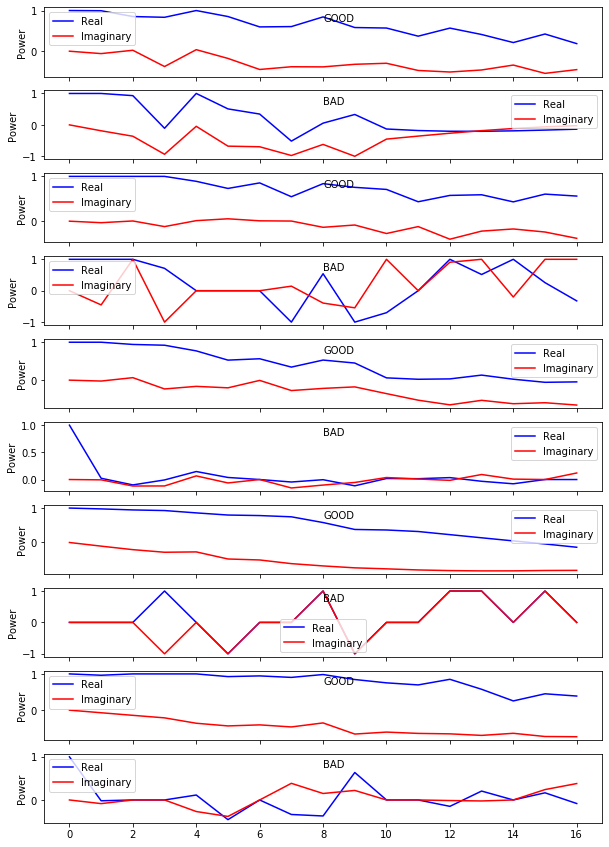

In [0]:
#Let's look at the first few examples as a time series
fig, axs = plt.subplots(10, 1, sharex='col')

for i in range(10):
  example = list(ionosphere_data.loc[i])
  real = example[0:-1:2]
  imaginary = example[1::2]

  axs[i].plot(np.arange(len(real)), real, 'b', label="Real")
  axs[i].plot(np.arange(len(imaginary)), imaginary, 'r', label="Imaginary")
  axs[i].set_ylabel("Power")
  axs[i].legend()

  if example[-1] == 'g':
    plt.text(0.5, 0.8,'GOOD',
     transform = axs[i].transAxes)
  else:
    plt.text(0.5, 0.8,'BAD',
     transform = axs[i].transAxes)
  
fig.set_size_inches(10, 15)

#Bad examples seem to have higher variance than good examples
#Also, the distance between the real and imaginary series seems larger for good examples


In [0]:
good_ionosphere = ionosphere_data[ionosphere_data['label'] == 'g']
bad_ionosphere = ionosphere_data[ionosphere_data['label'] == 'b']
#Isolate the good and bad examples

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


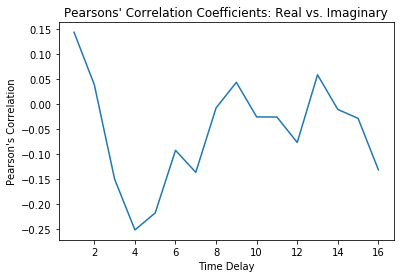

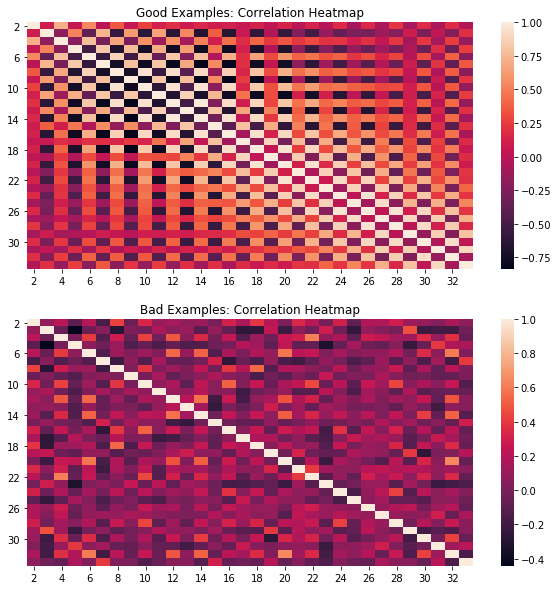

In [0]:
#Here, we calculate some correlations
#First, we find the pearson's correlation coefficients between each pair of real and imaginary features
#Then, we plot the correlation between all different features for good examples and bad examples


## PEARSON'S CORRELATION FOR REAL/IMAGINARY PAIRS ##
correlations = []
for i in range(0, 33, 2):
  correlations.append(np.corrcoef(ionosphere_data[i], ionosphere_data[i+1])[1,0])

fig = plt.figure()
plt.plot(np.arange(17), correlations)
plt.title("Pearsons' Correlation Coefficients: Real vs. Imaginary")
plt.xlabel("Time Delay")
plt.ylabel("Pearson's Correlation")



## CORRELATION FOR GOOD AND BAD EXAMPLES ##

total_good_corr = good_ionosphere.drop([0, 1], axis=1, inplace=False).corr() #because the first two columns are always 1 or 0, we don't analyze them
total_bad_corr = bad_ionosphere.drop([0, 1], axis=1, inplace=False).corr()

fig2, ax2 = plt.subplots(2)
ax2[0].set_title("Good Examples: Correlation Heatmap")
ax2[1].set_title("Bad Examples: Correlation Heatmap")


sns.heatmap(total_good_corr, ax=ax2[0])
sns.heatmap(total_bad_corr, ax=ax2[1])


fig2.set_size_inches(10, 10)


#Notice the checkerboard pattern resulting from the structure of the data
#Each real time point correlates well with surrounding real time points, but not with adjacent imaginary ones
#Bad examples don't show structured correlatoin patterns

In [0]:
# With previous findings, autocorrelations of imaginary/real time series could be a valuable new features

normalized_autocorr_real = []
normalized_autocorr_im = []

for example in ionosphere_data.drop(labels=[0, 1, 'label'], axis=1).iterrows():
  real_series = example[1][::2]
  im_series = example[1][1::2]

  lag = 1
  normalized_autocorr_real.append(np.corrcoef(np.array([real_series[:-lag], real_series[lag:]]))[0,1])
  normalized_autocorr_im.append(np.corrcoef(np.array([im_series[:-lag], im_series[lag:]]))[0,1])

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


In [0]:
ionosphere_data['label'][np.isnan(np.array(normalized_autocorr_real))]
#Some null values appeared in calculating autocorrelatoin
#Check associated labels

11     b
25     b
80     g
81     b
173    g
175    g
214    b
216    b
222    b
228    b
312    g
Name: label, dtype: object

In [0]:
ionosphere_data['label'][np.isnan(np.array(normalized_autocorr_im))]
#Check associated labels again

168    b
Name: label, dtype: object

In [0]:
#Labels weren't consistently good or bad
#We will impute nan values with the mean of autocorrelations

autocorr_df = pd.DataFrame(data={'acorr_real': normalized_autocorr_real, 'acorr_im': normalized_autocorr_im}, dtype=float)
autocorr_df.fillna(autocorr_df.mean(), inplace=True)
autocorr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
acorr_real    351 non-null float64
acorr_im      351 non-null float64
dtypes: float64(2)
memory usage: 5.6 KB


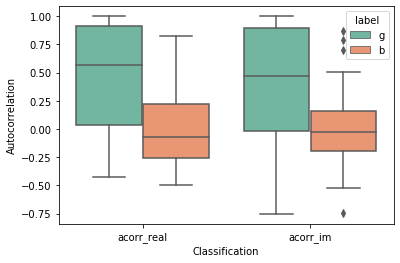

In [0]:
autocorr_melted = pd.melt(pd.concat([autocorr_df, ionosphere_data['label']], axis=1), id_vars=["label"], value_vars=["acorr_real", "acorr_im"], var_name = "Classification", value_name = "Autocorrelation")
sns.boxplot(x="Classification", y="Autocorrelation", hue="label", data=autocorr_melted, palette="Set2")
#Good examples demonstrate higher autocorrelation than bad examples

Text(0.5, 0.07, 'Time')

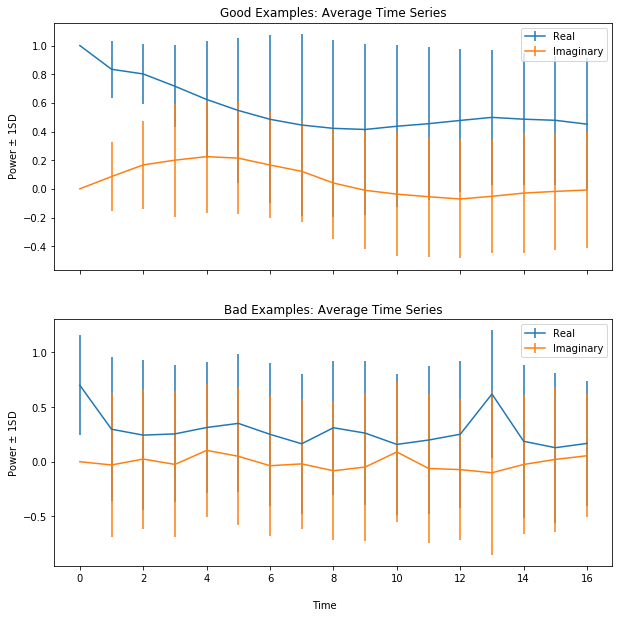

In [0]:
#Show average time series for GOOD vs BAD examples
good_means = np.mean(good_ionosphere, axis=0)
bad_means = np.mean(bad_ionosphere, axis=0)

good_std = np.std(good_ionosphere, axis=0)
bad_std = np.std(bad_ionosphere, axis=0)

fig, axs = plt.subplots(2, sharex='col')
axs[0].errorbar(np.arange(17), good_means[0:-1:2], yerr = good_std[0:-1:2], label="Real")
axs[0].errorbar(np.arange(17), good_means[1::2], yerr = good_std[1::2], label="Imaginary")
axs[0].legend()
axs[0].set_title("Good Examples: Average Time Series")
axs[0].set_ylabel("Power $\pm$ 1SD")

axs[1].errorbar(np.arange(17), bad_means[0:-1:2], yerr = bad_std[0:-1:2], label="Real")
axs[1].errorbar(np.arange(17), bad_means[1::2], yerr = bad_std[1::2], label="Imaginary")
axs[1].legend()
axs[1].set_title("Bad Examples: Average Time Series")
axs[1].set_ylabel("Power $\pm$ 1SD")

fig.set_size_inches(10.0, 10.0)
fig.text(0.5, 0.07, 'Time', ha='center', va='center')

#This once again shows that good examples have real/imaginary series that are further apart

Text(0.5, 1.0, 'Standard Deviations: Good vs. Bad Examples')

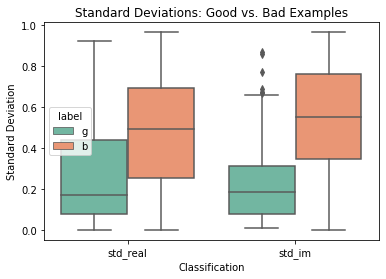

In [0]:
# As we saw earlier, standard deviation might be a discriminative features

real_std = np.std(ionosphere_data[ionosphere_data.columns[0:-3:2]], axis=1)
im_std = np.std(ionosphere_data[ionosphere_data.columns[1:-3:2]], axis=1)
std_df = pd.DataFrame({'std_real': real_std, 'std_im': im_std}, dtype=float)

std_melted = pd.melt(pd.concat([std_df, ionosphere_data['label']], axis=1), id_vars=["label"], value_vars=["std_real", "std_im"], var_name = "Classification", value_name = "Standard Deviation")
sns.boxplot(x="Classification", y="Standard Deviation", hue="label", data=std_melted, palette="Set2")

plt.title("Standard Deviations: Good vs. Bad Examples")

#Good examples have LOWER standard deviation than bad examples

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


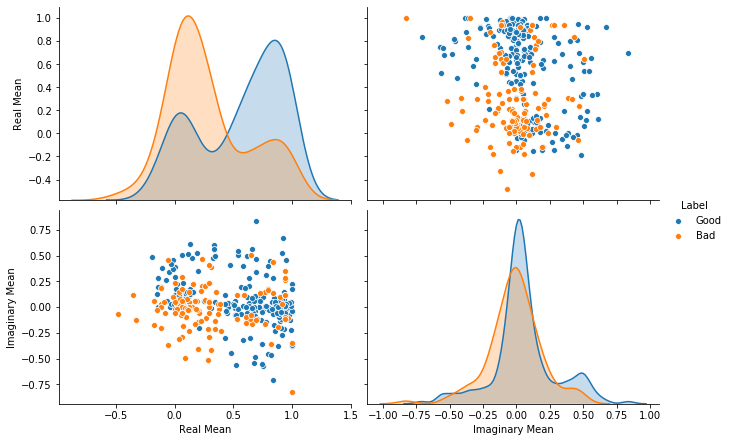

In [0]:
# Show distributions of average real/imaginary time series by label

real_mean = np.mean(ionosphere_data[ionosphere_data.columns[0:-1:2]], axis=1)
im_mean = np.mean(ionosphere_data[ionosphere_data.columns[1::2]], axis=1)

dist_df = pd.concat([real_mean, im_mean, ionosphere_data['label']], axis=1)
dist_df.columns = ["Real Mean", "Imaginary Mean", "Label"]
dist_df["Label"][dist_df["Label"]=='g'] = "Good"
dist_df["Label"][dist_df["Label"]=='b'] = "Bad"
sns.pairplot(dist_df, hue='Label', height=3, aspect=1.5)

#We can see that good examples, have very discriminative real means
#Imaginary means have similar distributions, but with higher variance in bad examples

Text(0.5, 1.0, 'Label Distribution')

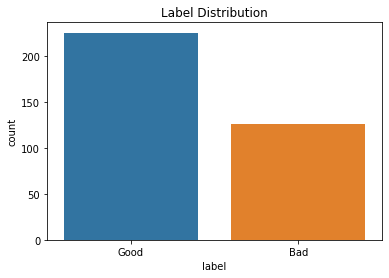

In [0]:
fig = sns.countplot(x='label', data=ionosphere_data)
plt.xticks(np.arange(2), ["Good", "Bad"])
plt.title("Label Distribution")

#More bad examples than good examples

Text(0.5, 1.0, 'Distributions of Real Variables')

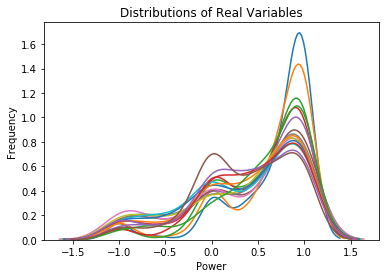

In [0]:
for col in range(2, ionosphere_data.shape[1] - 1, 2):
  sns.distplot(ionosphere_data[ionosphere_data.columns[col]], hist=False)

plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Distributions of Real Variables")


#For all real variables, these are their distributions

Text(0.5, 1.0, 'Distributions of Imaginary Variables')

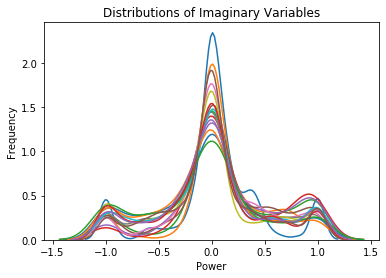

In [0]:
for col in range(3, ionosphere_data.shape[1] - 1, 2):
  sns.distplot(ionosphere_data[ionosphere_data.columns[col]], hist=False)

plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Distributions of Imaginary Variables")

#Same for imaginary variables

In [0]:
ionosphere_data.shape

(351, 35)

In [0]:
ionosphere_labels_df = ionosphere_data['label']
ionosphere_df = ionosphere_data.drop([1, 'label'], axis=1)
ionosphere_new_features_df = pd.concat([autocorr_df, std_df], axis=1)
ionosphere_df

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [0]:
#As a last layer of preprocessing, apply standard scaling to each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ionosphere = scaler.fit_transform(ionosphere_df).astype(float)
ionosphere_new_features = scaler.fit_transform(ionosphere_new_features_df)
ionosphere_labels = ionosphere_labels_df.to_numpy().reshape(-1, 1)


#Encode labels
ionosphere_labels[ionosphere_labels == 'g'] = 1
ionosphere_labels[ionosphere_labels == 'b'] = 0
ionosphere_labels = ionosphere_labels.astype(int)

Text(0.5, 1.0, 'Distributions of Standardized Real Variables')

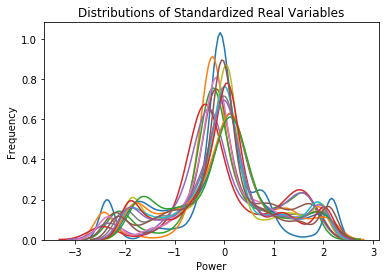

In [0]:
for col in range(2, ionosphere.shape[1], 2):
  sns.distplot(ionosphere[:, col], hist=False)

plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Distributions of Standardized Real Variables")

#After normalization, the means clearly shift to zero

Text(0.5, 1.0, 'Distributions of Standardized Imaginary Variables')

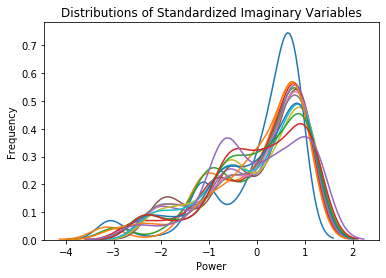

In [0]:
for col in range(3, ionosphere.shape[1], 2):
  sns.distplot(ionosphere[:, col], hist=False)

plt.xlabel("Power")
plt.ylabel("Frequency")
plt.title("Distributions of Standardized Imaginary Variables")

In [0]:
ionosphere.shape

(351, 33)

## Adult Data Set

In [0]:
adult_upload = files.upload()
adult_col_names = ["age", "workclass", "final_weight", "education", "education_num", 
                   "marital_status", "occupation", "relationship", "race", 
                   "sex", "capital_gain", "capital_loss", "hours_per_week",
                   "native_country", "income"]
adult_data = pd.read_csv(io.StringIO(adult_upload['adult.data'].decode('utf-8')), header=None, names=adult_col_names)

Saving adult.data to adult.data


In [0]:
adult_test_upload = files.upload()
adult_test = pd.read_csv(io.StringIO(adult_test_upload['adult.test'].decode('utf-8')), header=None, names=adult_col_names, skiprows=1)

Saving adult.test to adult.test


In [0]:
#We merge the train and test sets and preprocess everything together
adult_data = pd.concat([adult_data, adult_test])
adult_data.reset_index(drop=True, inplace=True)
adult_backup = adult_data.copy()
adult_data

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [0]:
adult_data.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
adult_data.info()
#No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
final_weight      48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [0]:
adult_data['income'].value_counts()
#Fix discrepancies!

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

In [0]:
adult_data['income'].replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'}, inplace=True)
adult_data['income'].value_counts()

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

Text(0.5, 1.0, 'Adult Census Label Distribution')

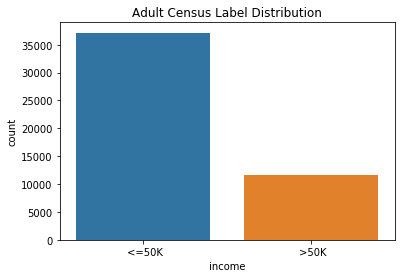

In [0]:
fig = sns.countplot(x="income", data=adult_data)
plt.title("Adult Census Label Distribution")
#Many more sub 50K than above 50K

In [0]:
adult_data['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [0]:
adult_data['education_num'].value_counts()
#These correspond perfectly to the categorical education variable

# 1:preschool
# 2:1st-4th
# 3:5th-6th
# 4:7th-8th
# 5:9th
# 6:10th
# 7:11th
# 8:12th
# 9:HS-grad
# 10:Some-College
# 11:Assoc-voc
# 12:Assoc-acdm
# 13:Bachelors
# 14:Masters
# 15:Prof-schoo
# 16:Doctorate

#Although the ascending numerical representation could represent higher educational achievement,
#It may be inaccurate to represent educational levels as evenly spaced numerical values
#It's safer to do one-hot encoding!

#We will drop the education_num column before training

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

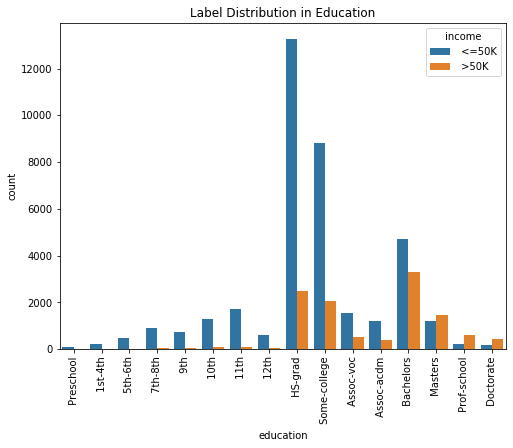

In [0]:
sorted_education = [x for _, x in sorted(zip(adult_data["education_num"].value_counts().index,
                                       adult_data["education"].value_counts().index))]

plt.figure(figsize=(8, 6))
fig = sns.countplot(x="education_num", hue="income", data=adult_data)
plt.xticks(rotation=90)
plt.xlabel("education")
plt.title("Label Distribution in Education")

_ = fig.set_xticklabels(sorted_education)


#This shows the education distribution between the two labels

In [0]:
#To clarify the visual, we also give a normalized version
#This is done for a collection of different features so we modularize

def normalized_count_plot(x, y, data):
  fig = data.groupby(x)[y].value_counts(normalize=True).mul(100)\
    .rename('percent').reset_index()\
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')

  _ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
  return fig



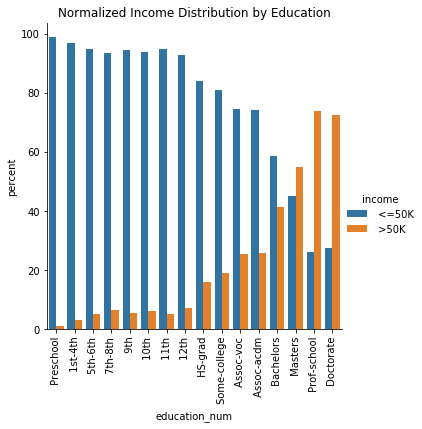

In [0]:
fig = normalized_count_plot('education_num', 'income', adult_data)
plt.title("Normalized Income Distribution by Education")
_ = fig.set_xticklabels(sorted_education)


In [0]:
adult_data["native_country"].value_counts()
#Lots of different features! Concern of dimensionality issues upon training
#857 malformed examples

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [0]:
adult_data = adult_data[adult_data['native_country'] != ' ?'] 
#drop those examples
adult_data.reset_index(drop=True, inplace=True)

In [0]:
#For visualizatoin, map countries to their geographical region
#Upon training, this could be a way to get around dimensionality issues as well
#Will be explored in feature selection

country_mapping = {
    ' United-States': "northern_america",
    ' Canada': "northern_america",
    ' Mexico': "central_america",
    " Puerto-Rico": "carribean",
    " India": "southern_asia",
    " El-Salvador": "central_america",
    " Cuba": "carribean",
    " England": "western_europe",
    " Jamaica": "carribean",
    " Italy": "southern_europe",
    " China": "eastern_europe",
    " Dominican-Republic": "carribean",
    " Vietnam": "southeast_asia",
    " Guatemala": "central_america",
    " Japan": "eastern_asia",
    " Columbia": "south_america",
    " Poland": "eastern_europe",
    " Haiti": "carribean", 
    " Iran": "western_asia",
    " Taiwan": "eastern_asia",
    " Portugal": "southern_europe",
    " Nicaragua": "central_america",
    " Peru": "south_america",
    " Greece": "southern_europe",
    " Ecuador": "south_america",
    " France": "western_europe",
    " Ireland": "western_europe",
    " Hong": "eastern_asia",
    " Trinadad&Tobago": "carribean",
    " Cambodia": "southeast_asia",
    " Laos": "southeast_asia",
    " Thailand": "southeast_asia",
    " Yugoslavia": "eastern_europe",
    " Hungary": "eastern_europe",
    " Honduras": "central_america",
    " Scotland": "western_europe",
    " Holand-Netherlands": "western_europe",
    " Philippines": "southeast_asia",
    " Germany": "western_europe",
    " Outlying-US(Guam-USVI-etc)": "misc",
    " South": "misc"
}

In [0]:
native_region = adult_data["native_country"].replace(country_mapping)
native_region.rename("native_region", inplace=True)
native_region.value_counts()

northern_america    44014
central_america      1263
carribean             633
southeast_asia        462
western_europe        430
eastern_europe        251
southern_europe       221
eastern_asia          187
south_america         176
southern_asia         151
misc                  138
western_asia           59
Name: native_region, dtype: int64

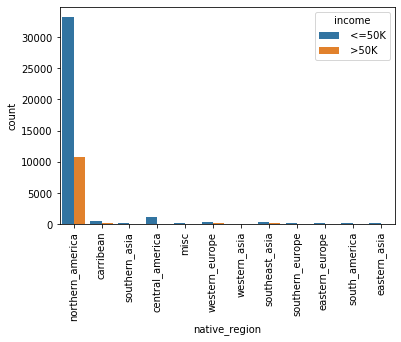

In [0]:
native_region_df = pd.concat([native_region, adult_data["income"]], axis=1)
fig = sns.countplot(x="native_region", hue="income", data=native_region_df)
_ = plt.xticks(rotation=90)
#not super helpful so plot normalized version

Text(0.5, 1, 'Normalized Income Distribution by Native Region')

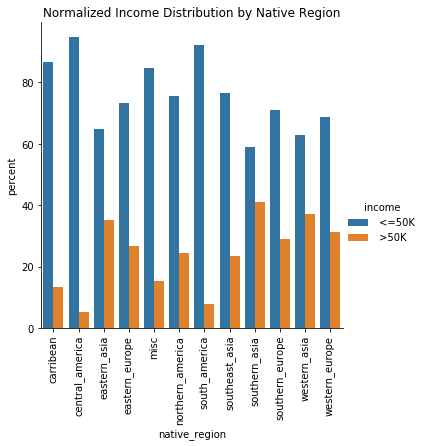

In [0]:
normalized_count_plot('native_region', 'income', native_region_df)
plt.title("Normalized Income Distribution by Native Region")
#notice the lower income in the carribean, south america, central america

In [0]:
adult_data["age"].describe()

count    47985.000000
mean        38.641284
std         13.729622
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

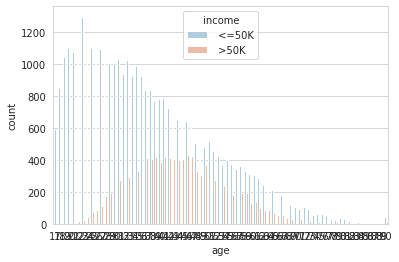

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='age',hue='income', data=adult_data,palette='RdBu_r')
#Younger Population makes less money, but as population grows that gap between <=50K and >50K lessens, meaning people get paid more as they age.

Text(0, 0.5, 'Power')

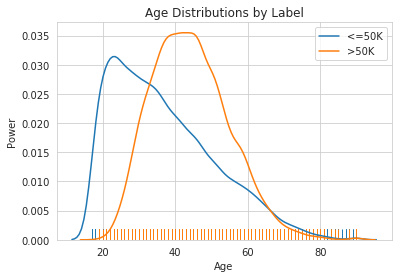

In [0]:
target_1 = adult_data.loc[adult_data['income'] == " <=50K"]
target_0 = adult_data.loc[adult_data['income'] == " >50K"]

sns.distplot(target_1[['age']], hist=False, rug=True, label="<=50K")
sns.distplot(target_0[['age']], hist=False, rug=True, label=">50K")

plt.title("Age Distributions by Label")
plt.xlabel("Age")
plt.ylabel("Power")

In [0]:
adult_data["workclass"].value_counts()
#2753 more examples with missing features

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 ?                    2753
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [0]:
adult_data = adult_data[adult_data['workclass'] != ' ?'] #drop those rows
adult_data.reset_index(drop=True, inplace=True) 
adult_data["workclass"].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

Text(0.5, 1, 'Normalized Income Distribution by Workclass')

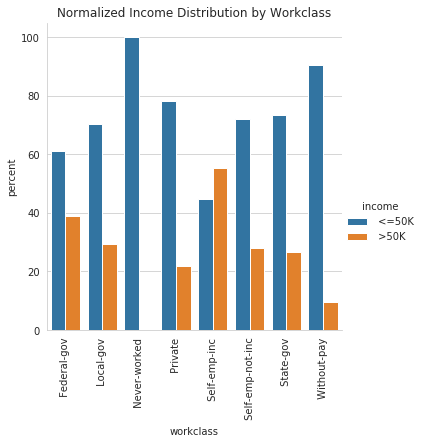

In [0]:
normalized_count_plot('workclass', 'income', adult_data)
plt.title("Normalized Income Distribution by Workclass")

Text(0.5, 1, '% >50K by Marital Status and Sex')

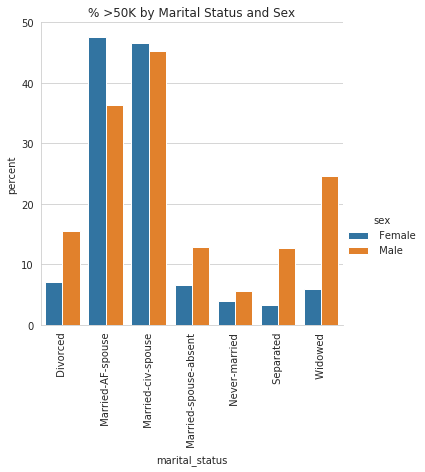

In [0]:
fig = adult_data.groupby(["marital_status", 'sex'])["income"].value_counts(normalize=True).mul(100)\
.rename('percent').reset_index().iloc[1::2]\
.pipe((sns.catplot,'data'), x='marital_status',y='percent',hue='sex',kind='bar')

_ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
plt.title("% >50K by Marital Status and Sex")

#In marriages, the women seem to be making more money
#In every other situation, men are earning more

Text(0.5, 1, 'Normalized Income Distribution by Relationship')

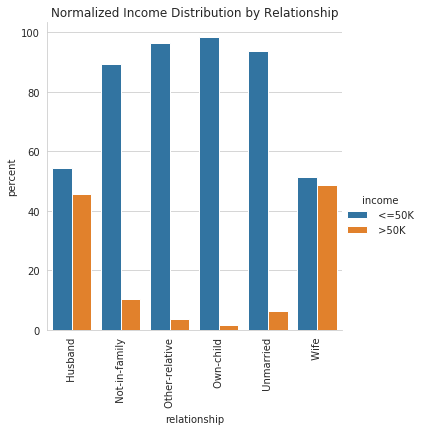

In [0]:
normalized_count_plot("relationship", "income", adult_data)
plt.title("Normalized Income Distribution by Relationship")
#Marriages make money!

Text(0.5, 1, 'Normalized Income Distribution by Race')

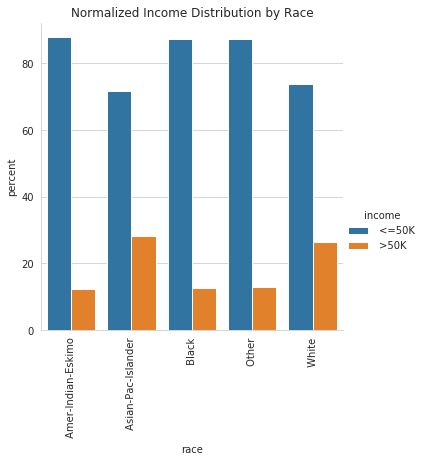

In [0]:
normalized_count_plot("race", "income", adult_data)
plt.title("Normalized Income Distribution by Race")

In [0]:
adult_data["occupation"].value_counts()
#Ten more malformed examples

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
 ?                      10
Name: occupation, dtype: int64

In [0]:
adult_data = adult_data[adult_data["occupation"] != " ?"]
adult_data.reset_index(drop=True, inplace=True)

Text(0.5, 1, 'Normalized Income Distribution by Occupation')

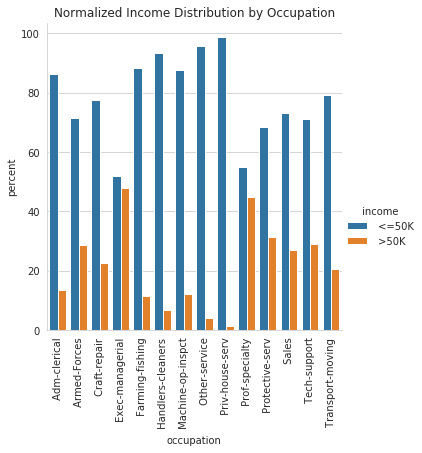

In [0]:
normalized_count_plot("occupation", "income", adult_data)
plt.title("Normalized Income Distribution by Occupation")

Text(0, 0.5, 'Power')

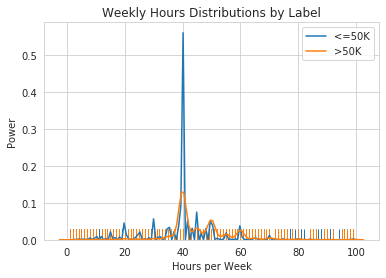

In [0]:
target_0 = adult_data.loc[adult_data['income'] == " >50K"]
target_1 = adult_data.loc[adult_data['income'] == " <=50K"]

sns.distplot(target_1[['hours_per_week']], hist=False, rug=True, label="<=50K")
sns.distplot(target_0[['hours_per_week']], hist=False, rug=True, label=">50K")

plt.title("Weekly Hours Distributions by Label")
plt.xlabel("Hours per Week")
plt.ylabel("Power")

In [0]:
adult_data["final_weight"].describe()

count    4.522200e+04
mean     1.897347e+05
std      1.056392e+05
min      1.349200e+04
25%      1.173882e+05
50%      1.783160e+05
75%      2.379260e+05
max      1.490400e+06
Name: final_weight, dtype: float64

Text(0.5, 1, 'Distributions of Final Weight by Income')

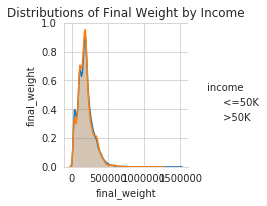

In [0]:
fnlwgt = adult_data.loc[:, ["final_weight", "income"]]
sns.pairplot(fnlwgt, hue="income")
plt.title("Distributions of Final Weight by Income")
#Final weight is a property of the census, not the actual people
#Evidently it's not discriminative!

In [0]:
adult_data['capital_gain'].value_counts()

0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
1731         1
22040        1
7262         1
1639         1
2387         1
Name: capital_gain, Length: 121, dtype: int64

In [0]:
adult_data['capital_loss'].value_counts()

0       43082
1902      294
1977      246
1887      228
2415       68
        ...  
2201        1
1421        1
4356        1
2163        1
1870        1
Name: capital_loss, Length: 97, dtype: int64

Text(0.5, 1.04, 'Numerical Features: Scatter Plots and Distributions')

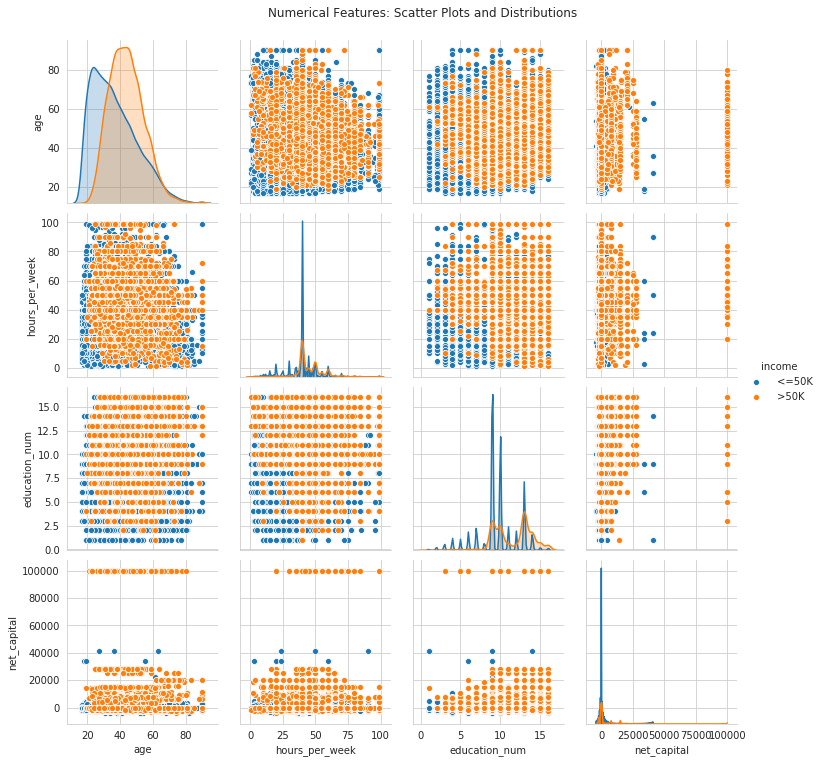

In [0]:
#To explore some of the numerical correlations, look at age, hours per week, and net capital
#Combining capital gain and loss allows us to be more concise
adult_num = adult_data.loc[:, ["age", "hours_per_week", "education_num"]]
adult_num["net_capital"] = adult_data["capital_gain"] - adult_data["capital_loss"]
adult_num["income"] = adult_data["income"]
g = sns.pairplot(adult_num, hue='income')
g.fig.suptitle("Numerical Features: Scatter Plots and Distributions", y=1.04)

#No combination makes the labels noticeably separable
#Those with high net capital all make more money

In [0]:
adult_num["income"].replace({" >50K": 1, " <=50K": 0}, inplace=True)

Text(0.5, 1, 'Correlation Heatmap: Numerical Data')

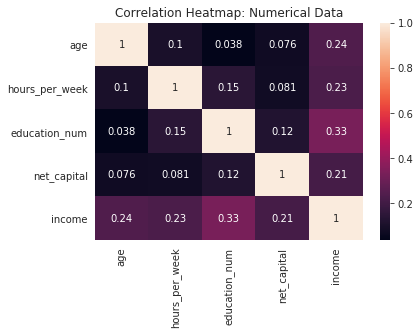

In [0]:
numerical_correlation = adult_num.corr()
sns.heatmap(numerical_correlation, annot=True)
plt.title("Correlation Heatmap: Numerical Data")
#We can see some mild correlation between greater hours, higher net capital, age and income

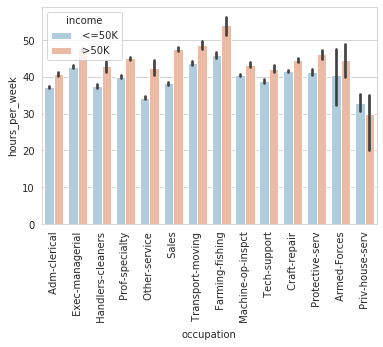

In [0]:
sns.set_style('whitegrid')
sns.barplot(x='occupation', y='hours_per_week', hue='income',data=adult_data ,palette='RdBu_r')
#Richer people work more hours_per_week, and in the survey people in "farming-fishing" have highest frequency >50K
_ = plt.xticks(rotation=90)

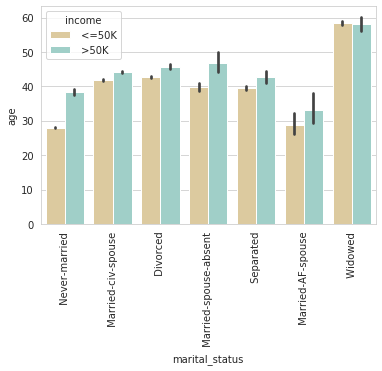

In [0]:
sns.barplot(x='marital_status', y='age', hue='income',data=adult_data ,palette='BrBG')
_ = plt.xticks(rotation=90)

Text(0.5, 1.0, 'Educational Achievement Distribution')

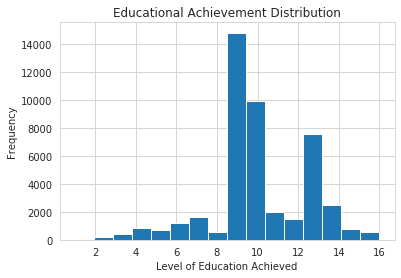

In [0]:
adult_data["education_num"].hist(bins=16)
plt.xlabel("Level of Education Achieved")
plt.ylabel("Frequency")
plt.title("Educational Achievement Distribution")

In [0]:
adult_data["income"].replace({" >50K": 1, " <=50K": 0}, inplace=True)

In [0]:
adult_df = adult_data.copy()
adult_df

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
45218,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
45219,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
45220,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [0]:
adult_labels_df = adult_df.loc[:, "income"]
adult_df.drop(["income", "education_num"], axis=1, inplace=True)
# we one-hot encode education instead of using education-num
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
age               45222 non-null int64
workclass         45222 non-null object
final_weight      45222 non-null int64
education         45222 non-null object
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
dtypes: int64(5), object(8)
memory usage: 4.5+ MB


In [0]:
adult_regions_df = adult_df.drop("native_country", axis=1)
adult_regions_df["native_region"] = native_region_df['native_region']
adult_regions_df

,age,workclass,final_weight,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_region
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,northern_america
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,northern_america
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,northern_america
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,northern_america
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,carribean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,south_america
45218,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,northern_america
45219,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,northern_america
45220,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,northern_america


In [0]:
adult_df = pd.get_dummies(adult_df)
adult_df.shape

(45222, 103)

In [0]:
adult_df

,age,final_weight,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,245211,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45218,39,215419,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45219,38,374983,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45220,44,83891,5455,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
adult_regions_df = pd.get_dummies(adult_regions_df)
adult_regions_df.shape
#This encoding reduces the number of features a lot; we'll compare the two on performance in part 3

(45222, 74)

In [0]:
adult_regions_df

,age,final_weight,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_carribean,native_region_central_america,native_region_eastern_asia,native_region_eastern_europe,native_region_misc,native_region_northern_america,native_region_south_america,native_region_southeast_asia,native_region_southern_asia,native_region_southern_europe,native_region_western_asia,native_region_western_europe
0,39,77516,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,50,83311,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,38,215646,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,53,234721,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,28,338409,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,245211,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
45218,39,215419,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
45219,38,374983,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
45220,44,83891,5455,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
adult = adult_df.to_numpy()
adult_regions = adult_regions_df.to_numpy()
adult_labels = adult_labels_df.to_numpy().reshape(-1, 1)

In [0]:
adult_numeric_ix = [0, 1, 2, 3, 4] #normalize these columns
from sklearn.compose import ColumnTransformer

adult_processor = ColumnTransformer([
                                     ('scaler', StandardScaler(), adult_numeric_ix)
], remainder='passthrough')

adult = adult_processor.fit_transform(adult)
adult_regions = adult_processor.fit_transform(adult_regions)

## Breast Cancer Dataset

In [0]:
breastcancer_upload = files.upload()

breastcancer_data = pd.read_csv(io.StringIO(breastcancer_upload['breast-cancer.data'].decode('utf-8')), header=None)
breastcancer_data

Saving breast-cancer.data to breast-cancer.data


,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [0]:
breastcancer_data.columns=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes','node-caps','deg-malig', 'breast', 'breast-quad', 'irradiat']
breastcancer_data.info()
#No Null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [0]:
breastcancer_data['node-caps'].value_counts()
#8 malformed examples

no     222
yes     56
?        8
Name: node-caps, dtype: int64

In [0]:
breastcancer_data = breastcancer_data[breastcancer_data['node-caps'] != '?'] #drop those rows
breastcancer_data.reset_index(drop=True, inplace=True)

In [0]:
breastcancer_data.describe()
#only one numeric feature

,deg-malig
count,278.000000
mean,2.061151
std,0.730858
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


Text(0.5, 1.0, 'Breast Cancer Label Distribution')

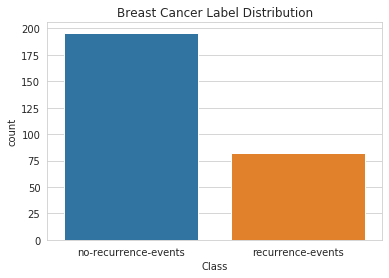

In [0]:
sns.countplot(x="Class", data=breastcancer_data)
plt.title("Breast Cancer Label Distribution")
#Mostly negative examples

In [0]:
breastcancer_data["age"].value_counts()

50-59    92
40-49    89
60-69    55
30-39    36
70-79     5
20-29     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

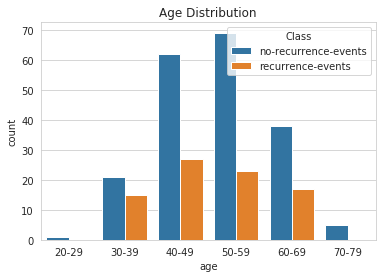

In [0]:
sns.countplot(x='age', hue="Class", data=breastcancer_data, 
              order = sorted(breastcancer_data["age"].value_counts().index))
plt.title("Age Distribution")
#There's only one individual < 30
#Having such non-representative features might bias something like Naive bayes
#A future direction might be to bin the age distributions to sub 30, 40-49, 50-59, and >60

Text(0.5, 1.0, 'Age and Malignancy Level')

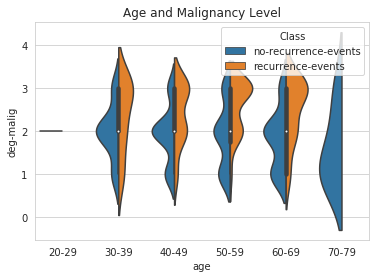

In [0]:
sns.violinplot(x='age', y= 'deg-malig', hue="Class", 
               order = sorted(breastcancer_data["age"].value_counts().index),
                              data=breastcancer_data, split=True)
plt.title("Age and Malignancy Level")
#Shows that higher malignancy levels indicate higher chance of recurrence
#Notice that the amount of tier 3 tumors increases with age

Text(0.5, 1, 'Tumor Size and Malignancy')

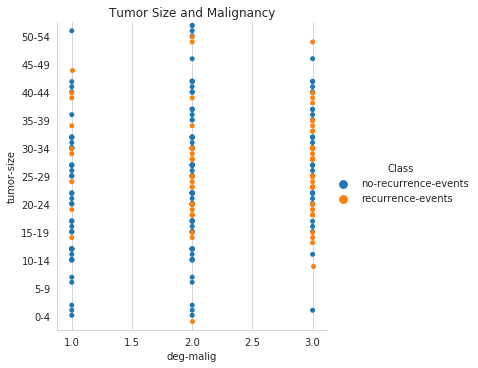

In [0]:
tumor_size_nat_order = sorted(breastcancer_data["tumor-size"].value_counts().index, reverse=True)
tumor_size_nat_order.insert(-1, tumor_size_nat_order.pop(1)) #5-9 is automatically put near front
tumor_size_nat_order
sns.catplot(x="deg-malig", y="tumor-size", order = tumor_size_nat_order,
            hue='Class', kind="swarm", dodge=True, data=breastcancer_data)
plt.title("Tumor Size and Malignancy")

In [0]:
breastcancer_data['inv-nodes'].value_counts()

0-2      210
3-5       34
6-8       17
9-11       7
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

In [0]:
invasive_node_ordering = sorted(breastcancer_data['inv-nodes'].value_counts().index)
for i in range(3):
  invasive_node_ordering.insert(1, invasive_node_ordering.pop(-1))

invasive_node_ordering

['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26']

Text(0.5, 1, '% Recurrence with Affected Lymph Nodes and Containment')

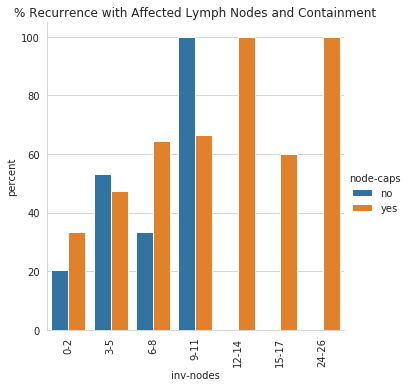

In [0]:
nodes_grouping = breastcancer_data.groupby(["inv-nodes", 'node-caps'])["Class"].value_counts(normalize=True).mul(100)\
.rename('percent').reset_index()

nodes_grouping = nodes_grouping[nodes_grouping["Class"] == "recurrence-events"].reset_index()
fig = nodes_grouping.pipe((sns.catplot, 'data'), x='inv-nodes',y='percent',hue='node-caps',kind='bar',
      order = invasive_node_ordering)

_ = [plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes.flat]
plt.title("% Recurrence with Affected Lymph Nodes and Containment")

#Eventually, as more lymph nodes are invaded the breast cancer becomes contained
#This may be due to saturation of the nodes?


In [0]:
breastcancer_data['breast-quad'].value_counts()
#one more malformed example

left_low     106
left_up       94
right_up      33
right_low     23
central       21
?              1
Name: breast-quad, dtype: int64

In [0]:
breastcancer_data = breastcancer_data[breastcancer_data['breast-quad'] != '?']
breastcancer_data.reset_index(drop=True, inplace=True)
breastcancer_data['breast-quad'].value_counts()

left_low     106
left_up       94
right_up      33
right_low     23
central       21
Name: breast-quad, dtype: int64

Text(0.5, 1.0, 'Class Distribution by Breast Quadrant')

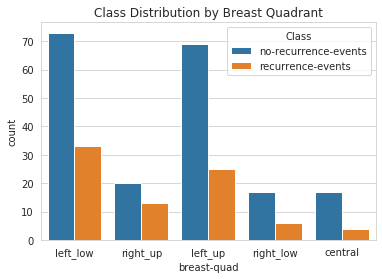

In [0]:
sns.countplot(x='breast-quad', hue='Class', data=breastcancer_data)
plt.title("Class Distribution by Breast Quadrant")

Text(0.5, 1.0, 'Count of Irradition treatement and Recurrence of Tumor')

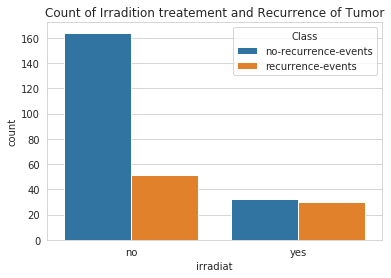

In [0]:
ax=sns.countplot(x="irradiat", hue="Class", data=breastcancer_data);
plt.title('Count of Irradition treatement and Recurrence of Tumor')
#People that get irradiation treatment are more likely to have had recurrence events

Text(0, 0.5, 'Frequency')

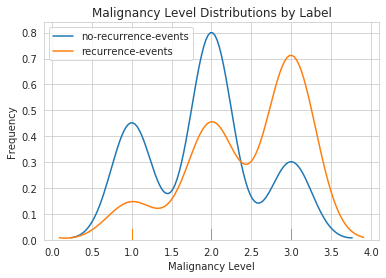

In [0]:
target_1 = breastcancer_data.loc[breastcancer_data['Class'] == "no-recurrence-events"]
target_0 = breastcancer_data.loc[breastcancer_data['Class'] == "recurrence-events"]

sns.distplot(target_1[['deg-malig']], hist=False, rug=True, label="no-recurrence-events")
sns.distplot(target_0[['deg-malig']], hist=False, rug=True, label="recurrence-events")

plt.title("Malignancy Level Distributions by Label")
plt.xlabel("Malignancy Level")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Node-Caps and Recurrence')

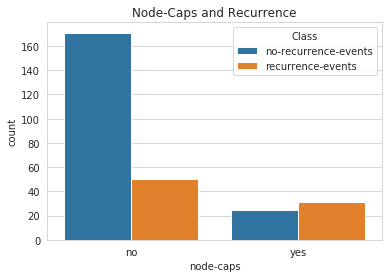

In [0]:
ax=sns.countplot(x="node-caps", hue="Class", data=breastcancer_data);
plt.title('Node-Caps and Recurrence')

Text(0.5, 1.0, 'Menopause and Recurrence')

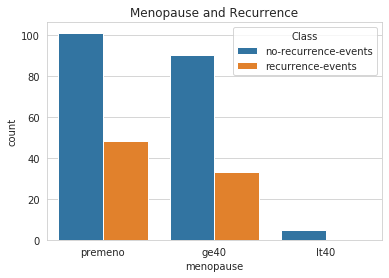

In [0]:
ax=sns.countplot(x="menopause", hue="Class", data=breastcancer_data);
plt.title('Menopause and Recurrence')

In [0]:
breastcancer_df = breastcancer_data.copy()
breastcancer_labels_df = breastcancer_df['Class']
breastcancer_labels_df.replace({'recurrence-events': 1, 'no-recurrence-events': 0}, inplace=True)
breastcancer_df.drop("Class", axis=1, inplace=True)
breastcancer_df = pd.get_dummies(breastcancer_df, columns = breastcancer_df.columns)
#Since every feature in this example represents a classification, we encode everything
#This incldues the deg-malig feature which is numeric, but really represents three classes of severity
breastcancer_df.shape
#41 features

(277, 41)

In [0]:
breastcancer = breastcancer_df.to_numpy()
breastcancer_labels = breastcancer_labels_df.to_numpy().reshape(-1, 1)
#Numpy arrays ready for training

## Banknote Authentification

In [0]:
banknote_upload = files.upload()

banknote_data = pd.read_csv(io.StringIO(banknote_upload['data_banknote_authentication.txt'].decode('utf-8')), header=None)
banknote_data

Saving data_banknote_authentication.txt to data_banknote_authentication.txt


,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [0]:
banknote_data.columns=['variance', 'skewness', 'kurtosis', 'entropy', 'label']

In [0]:
banknote_data.info()
#No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
label       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [0]:
banknote_data.describe()

,variance,skewness,kurtosis,entropy,label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Text(0.5, 1.0, 'Label Distribution')

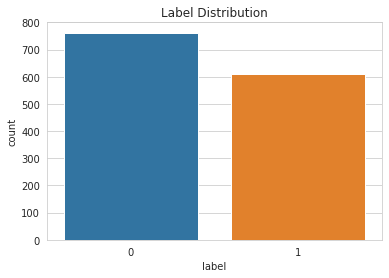

In [0]:
sns.countplot(x='label', data=banknote_data)
plt.title("Label Distribution")

Text(0.5, 1.04, 'Feature Distribution and Correlation')

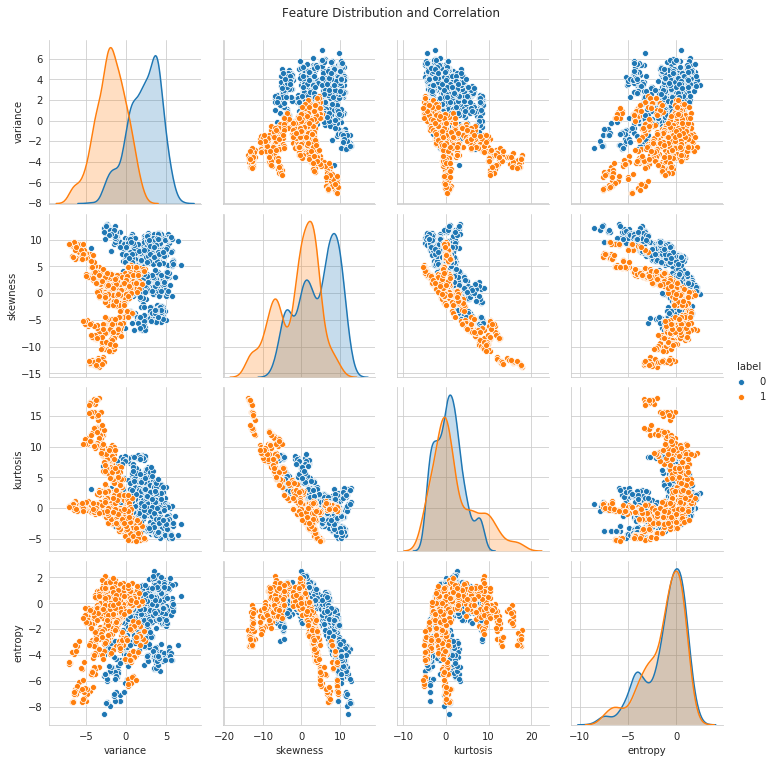

In [0]:
g = sns.pairplot(data=banknote_data, hue='label')
g.fig.suptitle("Feature Distribution and Correlation", y=1.04)
#No observable outliers

Text(0.5, 1, 'Banknote Feature and Label Correlation Heatmap')

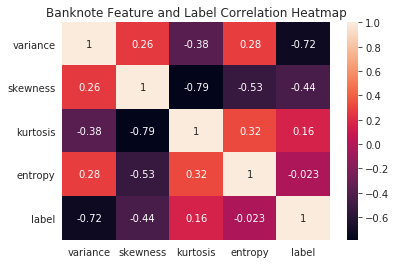

In [0]:
banknote_correlation = banknote_data.corr()
sns.heatmap(banknote_correlation, annot=True)
plt.title("Banknote Feature and Label Correlation Heatmap")

In [0]:
banknote_labels_df = banknote_data['label']
banknote_labels = banknote_labels_df.to_numpy().reshape(-1, 1)
banknote_df = banknote_data.drop('label', axis=1)
banknote = banknote_df.to_numpy()

banknote_scaler = StandardScaler()
banknote = banknote_scaler.fit_transform(banknote) #normalize all features

# Part 2

## Logistic Regression

In [0]:
class LogisticRegression:
  

  def __init__(self, learning_rate=0.01, grd_iter=1000, verbose=False, 
               lambda_penalty=0, elastic_ratio=0, tol=1e-5):
    '''
    0 <= elastic_ratio <= 1
    If elastic_ratio is 0, that means we have ALL L2 regularization
    If elastic_ratio is 1, that means we have ALL L1 regularization

    elastic_ratio determines the split between L1 and L2 regularization,
    essentially splitting the lambda_penalty parameter between them by some ratio

    tol will automatically stop training when the training is decrementing by a smaller value
    training is hardcapped by grd_iter for iterations
    '''
    assert 0 <= elastic_ratio and elastic_ratio <= 1, "Must provide elastic_ratio between 0 and 1 (inclusive)"
    assert learning_rate > 0 and grd_iter > 0 and tol > 0, "Must pass a positive learning_rate, grd_iter, tol"
    assert isinstance(grd_iter, int), "grd_iter must be an integer"
    assert lambda_penalty >= 0, "lambda_penatly must be greater than or equal to zero"


    #Initialize all parameters
    self.tol = tol
    self.learning_rate = learning_rate
    self.grd_iter = grd_iter
    self.fitted= False #This boolean is used to prevent predicting before fitting the model
    self.w = None #The size of this is determined when data is passed to fit
    self.verbose = verbose #Whether or not the model prints updates throughout training
    self.l1_lambda = (elastic_ratio) * lambda_penalty #Regularization split
    self.l2_lambda = (1 - elastic_ratio) * lambda_penalty
    
  def fit(self, X, y, add_bias=True):
    if add_bias:
      X = np.c_[np.ones((X.shape[0], 1)), X] 
      # The class is designed to work with datasets as-is (i.e. you don't have to manually add bias feature)
      # The model will automatically add the bias during fit or predict calls

    cost_array = [] # Fit returns the training cost at each iteration automatically
    self.fitted = True
    m = X.shape[0] #Num examples
    n = X.shape[1] #Num features (including bias)
    num_classes = 1 #assuming binary classification problem
    self.w = np.zeros((n, num_classes)) #Initialize weights to zero
    diff = float('inf') #Diff is what we compare to tol at each iteration
    J_prev = 0
    for i in range(self.grd_iter):
      if diff < self.tol: #Stop early
        if self.verbose:
          print(f"Stopping due to tolerance at iteration {i}...")
        break

      J = self.cost(X, y)
      diff = abs(J - J_prev) #How much did cost change?
      J_prev = J
      cost_array.append(J)

      if (self.verbose and i % 50 == 0):
        print(f"Iteration: {i+1} | Cost: {J}")

      grad = self.gradients(X, y) #compute gradients

      self.w = self.w - (self.learning_rate * (grad)) #updating...
    
    return cost_array
    
  def gradients(self, X, y):
    m = X.shape[0]
    y_pred = self.sigmoid(X)
    grad = (1/m) * np.dot(X.T, (np.subtract(y_pred, y)))
    grad += np.vstack((np.array([0]).reshape(1, 1), self.l1_lambda * np.sign(self.w[1:, 0].reshape(-1, 1))))
    #L1 regularization (unregularized bias)
    grad +=  np.vstack((np.array([0]).reshape(1, 1), self.l2_lambda * self.w[1:, 0].reshape(-1, 1)))
    #L2 regularization (unregularized bias)
    return grad

  def predict(self, X, add_bias=True):
    if (not self.fitted):
      print("Must FIT Logistic Regression before calling predict")
      return
    else:
      if add_bias:
        X = np.c_[np.ones((X.shape[0], 1)), X] #Adds bias automatically just like fit function
      y_pred = self.sigmoid(X)
      y_pred = y_pred >= 0.5 #Threshold set to 0.5 by default
      return y_pred

  def sigmoid(self, X):
    z = np.dot(X, self.w)
    return 1/(1+np.exp(-z))

  def cost(self, X, y):
    z = np.dot(X,self.w) #N x 1
    J = np.mean( y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)) )
    J +=  self.l2_lambda * (np.linalg.norm(self.w[1:, 0], 2, axis=0)**2)
    #Squared L2 norm
    J +=  self.l1_lambda * np.linalg.norm(self.w[1:, 0], 1, axis=0)
    #L1 norm
    return J

 


## Naive Bayes

In [0]:
class NaiveBayes():

  def __init__(self, verbose=False, eps=1e-6):
    self.fitted = False #Prevent calling predict until after fit is called
    self.verbose = verbose

    self.bernoulli_ix = [] #Stores column indices for bernoulliy (binary) indices
    self.gaussian_ix = [] #Will store the column indices for gaussian (continuous) features

    self.bernoulli_likelihood_w = None #Will be initialized to bernoulli likelihood parameters 
    # Will be (2 x D) for binary classification tasks
    self.gaussian_likelihood_mu = None #Gaussian likelihood parameters
    self.gaussian_likelihood_s = None
    self.class_prior = None

    self.bernoulli_features = None #Will store the corresponding bernoulli columns
    self.gaussian_features = None

    self.eps = eps #to avoid taking logs of zero, set to a small number

  def reset(self): #clears all model parmaeters
    self.fitted = False
    self.bernoulli_ix = []
    self.gaussian_ix = []

    self.bernoulli_likelihood_w = None
    self.gaussian_likelihood_mu = None
    self.gaussian_likelihood_s = None
    self.class_prior = None

    self.bernoulli_features = None
    self.gaussian_features = None

  def classify_features(self, X):

    self.binomial_ix = []
    self.gaussian_ix = []
    #Empty them

    for col in range(X.shape[1]):

      feature = X[:, col]
      if self.binary_checker(feature): #checks if feature is only 1 and 0
        self.bernoulli_ix.append(col)
      else:
        self.gaussian_ix.append(col) #otherwise set to gaussian
        #for our datasets we didn't use categorical distributions

    if self.bernoulli_ix:
      self.bernoulli_features = X[:, self.bernoulli_ix] #store feature

    if self.gaussian_ix:
      self.gaussian_features = X[:, self.gaussian_ix]

  def binary_checker(self, vec):
    return ((vec == 0) | (vec == 1)).all() #true if all 1 or 0

  def fit(self, X, y):
    assert self.binary_checker(y), "NaiveBayes is built for binary classifcation problems only.\n \
    Ensure that labels are binary." #model limited to binary classification
    self.reset()
    self.fitted=True

    self.classify_features(X) #bernoulli or gaussian for each feature

    if self.verbose:
      print(self.bernoulli_ix, "bernoulli")
      print(self.gaussian_ix, "gaussian")

    #Establishing likelihood parameters
    if self.bernoulli_ix:
      self.find_bernoulli_likelihood(self.bernoulli_features, y)
    if self.gaussian_ix:
      self.find_gaussian_likelihood(self.gaussian_features, y)
    self.find_prior(y)


  def find_bernoulli_likelihood(self, X, y):
    self.bernoulli_likelihood_w = np.empty((2, X.shape[1])) #Classes x Dimensions

    self.bernoulli_likelihood_w[0, :] = np.sum(np.logical_and(X==1, y==0), axis=0) / np.sum(y==0)
    #probability of x given y is 0
    self.bernoulli_likelihood_w[1, :] = np.sum(np.logical_and(X==1, y==1), axis=0) / np.sum(y==1)
    #probability of x given y is 1

  def find_gaussian_likelihood(self, X, y):
    self.gaussian_likelihood_mu = np.empty((2, X.shape[1]))
    self.gaussian_likelihood_s = np.empty((2, X.shape[1]))

    neg_ex = np.nonzero(y==0)[0]
    pos_ex = np.nonzero(y==1)[0]

    self.gaussian_likelihood_mu[0, :] = np.mean(X[neg_ex, :], axis=0)
    #average of x for when y is 0
    self.gaussian_likelihood_mu[1, :] = np.mean(X[pos_ex, :], axis=0)
    #average of x for when y is 1

    self.gaussian_likelihood_s[0, :] = np.std(X[neg_ex, :], axis=0)
    #standard deviation for when y is 0
    self.gaussian_likelihood_s[1, :] = np.std(X[pos_ex, :], axis=0)
    #standard deviatoin for when y is 1

  def find_prior(self, y):
    self.class_prior = np.empty((2, 1))
    self.class_prior[0, 0] = 1 - np.mean(y, axis=0) #prior for class 0
    self.class_prior[1, 0] = np.mean(y, axis=0) #prior for class 1

  def bernoulli_log_likelihood(self, X):
    #notice that we add epsilon to each log for numerical stability
    return (np.dot(np.log(self.bernoulli_likelihood_w + self.eps), X.T) + \
        np.dot(np.log(1-self.bernoulli_likelihood_w + self.eps), (1 - X).T))
  
  def gaussian_log_likelihood(self, X):
    return (- np.sum( np.log(self.gaussian_likelihood_s[:,None,:] + self.eps) +.5*(((X[None,:,:] \
        - self.gaussian_likelihood_mu[:,None,:])/self.gaussian_likelihood_s[:,None,:])**2), \
         axis=2))
    

  def predict(self, X):
    likelihood = np.zeros((2, X.shape[0]))
    if self.bernoulli_ix: #first add log likelihood from all bernoulli features
      likelihood = likelihood +  self.bernoulli_log_likelihood(X[:, self.bernoulli_ix])
    if self.gaussian_ix: #then from all continuous features
      likelihood = likelihood + self.gaussian_log_likelihood(X[:, self.gaussian_ix])
    
    joint = likelihood + np.log(self.class_prior + self.eps) #then for the priors
    return np.argmax(joint, axis=0).reshape(-1, 1) #predict by taking max probability 

## Evaluation Helper Methods

In [0]:
def evaluate_recall(y_true, y_pred):
  truePos = np.sum(np.logical_and(y_true == 1, y_pred == 1))
  falseNeg = np.sum(np.logical_and(y_true == 1, y_pred == 0))
  return np.divide( truePos, truePos + falseNeg )

def evaluate_prec(y_true, y_pred):
  truePos = np.sum(np.logical_and(y_true == 1, y_pred == 1))
  falsePos = np.sum(np.logical_and(y_true == 0, y_pred == 1))
  return np.divide( truePos, truePos + falsePos)

def evaluate_acc(y_true, y_pred):
  return np.mean(y_pred == y_true)

def evaluate(y_true, y_pred):
  acc = evaluate_acc(y_true, y_pred)
  prec = evaluate_prec(y_true, y_pred)
  recall = evaluate_recall(y_true, y_pred)
  f1 = 2 * (recall * prec) / (recall + prec)
  return {'accuracy': acc, 'precision': prec, 'recall': recall, 'f1': f1}

def evaluate_model(model, X, y):
  y_pred = model.predict(X)
  return evaluate(y, y_pred)

In [0]:
def k_fold_cv(k_folds, model, X, y, verbose=False):
  shuffled_X, shuffled_y = random_shuffle(X, y) #randomize ordering of data
  
  train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
  val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

  

  X_splits = np.array_split(shuffled_X, k_folds)
  y_splits = np.array_split(shuffled_y, k_folds)


  for k in range(k_folds): #take each split as the validation set
  
    X_val = X_splits[k]
    y_val = y_splits[k]

    X_train = np.vstack([X_splits[i] for i, _ in enumerate(X_splits) if i != k])
    #isolates other splits
    y_train = np.vstack([y_splits[i] for i, _ in enumerate(y_splits) if i != k])

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_eval = evaluate(y_train, y_train_pred)
    for key, metric in zip(train_metrics.keys(), train_eval.values()):
      train_metrics[key].append(metric)
    
    val_eval = evaluate(y_val, y_val_pred)
    for key, metric in zip(val_metrics.keys(), val_eval.values()):
      val_metrics[key].append(metric)

    if verbose:
      print(f"Fold: {k+1} | Training Accuracy: {train_metrics['accuracy'][k]} | \
        Validation Accuracy: {val_metrics['accuracy'][k]}")
    
  train_metrics['mean_accuracy'] = np.mean(train_metrics['accuracy'])
  train_metrics['mean_accuracy_err'] = np.std(train_metrics['accuracy'])
  train_metrics['mean_precision'] = np.mean(train_metrics['precision'])  
  train_metrics['mean_precision_err'] = np.std(train_metrics['precision'])
  train_metrics['mean_recall'] = np.mean(train_metrics['recall'])
  train_metrics['mean_recall_err'] = np.std(train_metrics['precision'])
  train_metrics['mean_f1'] = np.mean(train_metrics['f1'])
  train_metrics['mean_f1_err'] = np.std(train_metrics['precision'])

  val_metrics['mean_accuracy'] = np.mean(val_metrics['accuracy'])
  val_metrics['mean_accuracy_err'] = np.std(val_metrics['accuracy'])
  val_metrics['mean_precision'] = np.mean(val_metrics['precision'])
  val_metrics['mean_precision_err'] = np.std(val_metrics['accuracy'])
  val_metrics['mean_recall'] = np.mean(val_metrics['recall'])
  val_metrics['mean_recall_err'] = np.std(val_metrics['accuracy'])
  val_metrics['mean_f1'] = np.mean(val_metrics['f1'])
  val_metrics['mean_f1_err'] = np.std(val_metrics['accuracy'])


  if verbose: 
    print(f"Mean Training Accuracy: {train_metrics['mean_accuracy']} | \
    Mean Validation Accuracy: {val_metrics['mean_accuracy']}")

    print(f"Mean Training Precision: {train_metrics['mean_precision']} | \
    Mean Validation Precision: {val_metrics['mean_precision']}")

    print(f"Mean Training Recall: {train_metrics['mean_recall']} | \
    Mean Validation Recall: {val_metrics['mean_recall']}")

    print(f"Mean Training F1 Score: {train_metrics['mean_f1']} | \
    Mean Validation F1 Score: {val_metrics['mean_f1']}")

  model.fit(X, y) #retrain on all data!!

  return train_metrics, val_metrics


def random_shuffle(X, y):
  assert X.shape[0] == y.shape[0]
  p = np.random.permutation(X.shape[0]) #generates random permuation
  return X[p], y[p]

  

#Part 3

## Experiment Zero: Feature Comparison

In [0]:
import pickle
def save_data(data, filename):
  with open(filename, 'wb') as fp:
      pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)
  files.download(filename)


While exploring the ionosphere and adult datasets, analysis provided insight for potential methods of structurally altering the datasets.

In the ionosphere dataset, features like the standard deviation and autocorrelation of the real/imaginary time series showed to be discriminative. We want to explore whether adding these new features will improve model performance.

In the adult dataset, the native country feature generates 41 new features. Conversely, encoding countries by their geographical region instead will only generate 12. This dimensionality reduction could help mitigate overfitting, or it might lead to loss of useful information.

As such, briefly, before further experimenation, we decide on the final forms of our datasets via  cross-validation comparison with Logistic Regression and Naive Bayes.

In [0]:
## IONOSPHERE ##
X_ion = ionosphere
X_ion_new_features = ionosphere_new_features #comparison in experiment 0
y_ion = ionosphere_labels

## ADULT ##
X_adult = adult
X_adult_regions = adult_regions #comparison in experiment 0
y_adult = adult_labels

In [0]:
ionosphere_new_features_df

,acorr_real,acorr_im,std_real,std_im
0,0.719859,0.401574,0.238837,0.191480
1,0.375727,0.315488,0.504987,0.332603
2,0.629498,0.526299,0.195390,0.124348
3,0.313704,-0.156859,0.682458,0.620515
4,0.923595,0.812845,0.375458,0.231753
...,...,...,...,...
346,-0.029561,-0.142673,0.081387,0.079980
347,0.205196,0.268793,0.017758,0.039610
348,0.344105,0.408531,0.022100,0.029203
349,-0.084416,-0.049627,0.049376,0.047577


In [0]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    #returns iterable object of all subsets of 0,...,n

def new_features_evaluation(X, new_features, y, model):
  '''
  Runs cross-validation on every subset of new features
  '''
  num_features = new_features.shape[1]
  feature_subsets = powerset(list(range(num_features)))
  subsets = []
  train_results = []
  val_results = []
  for subset in feature_subsets:
    subsets.append(subset)   
    X_new = np.hstack([X, new_features[:, subset]]) #add a subset of the new features

    train_metrics, val_metrics = k_fold_cv(5, model, X_new, y, verbose=False)
    train_results.append(train_metrics['accuracy'])
    val_results.append(val_metrics['accuracy'])

  return subsets, np.array(train_results), np.array(val_results)

def accuracy_by_subset(subsets, train_results, val_results, new_feature_labels):
  '''
  Generates plots and gathers some metrics from the data
  ''' 
  
  train_acc = np.mean(train_results, axis=1).reshape(-1, 1)
  val_acc = np.mean(val_results, axis=1).reshape(-1, 1)

  train_err = np.std(train_results, axis=1).reshape(-1, 1)
  val_err = np.std(val_results, axis=1).reshape(-1, 1)

  x=np.arange(train_results.shape[0]).reshape(-1, 1)
  y=np.linspace(0, 1, 21)
  width=0.35

  tick_label = []
  for subset in subsets:
    new_label = [new_feature_labels[i] for i in subset] 
    tick_label.append(' + '.join(new_label))

  fig, ax = plt.subplots()
  train_bars = ax.bar(x - width/2, train_acc, width, linewidth=0.2, label='Train Accuracy', yerr=train_err)
  val_bars = ax.bar(x + width/2, val_acc, width, linewidth=0.2, label='Validation Accuracy', yerr=val_err)

  ax.set_ylabel('% Accuracy')
  ax.set_xlabel("Included Features")
  ax.set_title('Ionosphere Accuracy with New Features')
  ax.set_xticks(x)
  ax.set_yticks(y)
  ax.set_xticklabels(tick_label, rotation=45)
  ax.legend()


  return train_acc, val_acc, train_err, val_err, fig

In [0]:
def exp_zero_ionosphere(X, new_features, new_feature_labels, y):
  '''
  Runs the experiment and consolidates results
  '''
  log_rg = LogisticRegression(learning_rate=0.01, grd_iter=100000, verbose=False)
  nb = NaiveBayes()
  results = {'model': [],'figures': [], 'train_acc': [], 'val_acc': [], 
             'train_err': [], 'val_err': [], 'subsets': []}


  for model in [nb, log_rg]:
    subsets, train, val = new_features_evaluation(X, new_features, y, model)
    train_acc, val_acc, train_err, val_err, fig = accuracy_by_subset(subsets, train, val, new_feature_labels)
    results['model'].append(model)
    results['figures'].append(fig)
    results['train_acc'].append(train_acc)
    results['val_acc'].append(val_acc)
    results['train_err'].append(train_err)
    results['val_err'].append(val_err)
    results['subsets'].append(subsets)


  return results



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


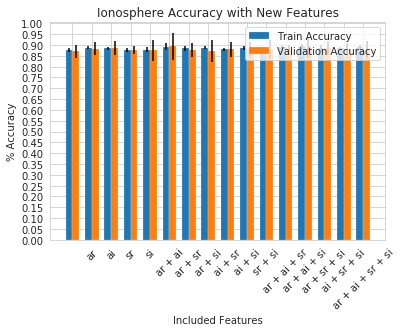

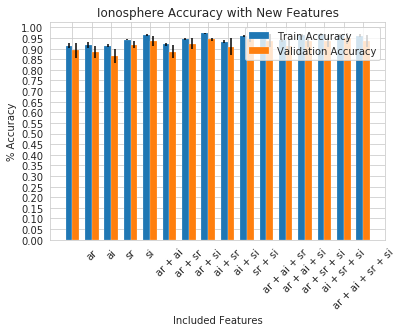

In [0]:
X_ion_new_feature_labels = ['ar', 'ai', 'sr', 'si']
results_ionosphere_exp0 = exp_zero_ionosphere(X_ion, X_ion_new_features, X_ion_new_feature_labels, y_ion)

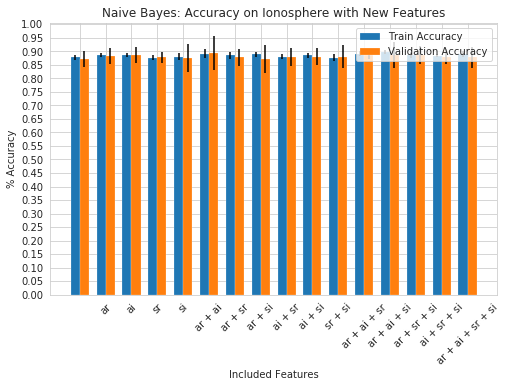

In [0]:
fig_1 = results_ionosphere_exp0['figures'][0]
fig_1.set_size_inches(8, 5)
fig_1.axes[0].set_title("Naive Bayes: Accuracy on Ionosphere with New Features")
fig_1

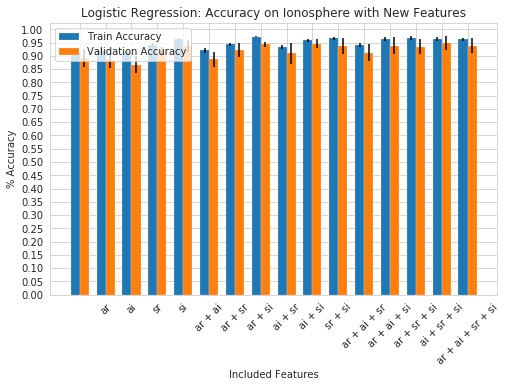

In [0]:
fig_2 = results_ionosphere_exp0['figures'][1]
fig_2.set_size_inches(8, 5)
fig_2.axes[0].set_title("Logistic Regression: Accuracy on Ionosphere with New Features")
fig_2

In [0]:
best_log_reg_ix = np.argmax(results_ionosphere_exp0['val_acc'][1])
best_log_reg_val = results_ionosphere_exp0['val_acc'][1][best_log_reg_ix]
best_log_reg_val_err = results_ionosphere_exp0['val_err'][1][best_log_reg_ix]
best_log_reg_train = results_ionosphere_exp0['train_acc'][1][best_log_reg_ix]
best_log_reg_train_err = results_ionosphere_exp0['train_err'][1][best_log_reg_ix]
best_log_reg_subset = results_ionosphere_exp0['subsets'][1][best_log_reg_ix]

print(f"The highest cross validation accuracy is: {best_log_reg_val} ", u"\u00B1", f" {best_log_reg_val_err}")
print(f"The corresponding train accuracy is: {best_log_reg_train} ", u"\u00B1", f" {best_log_reg_train_err}")
print(f"The corresponding subset of features is {[X_ion_new_feature_labels[i] for i in best_log_reg_subset]}")
#The best combination includes the imaginary standard deviation, and the real autocorrelation

print("The cross validation accuracy with no additional features is "
    f"{results_ionosphere_exp0['val_acc'][1][0]} ", u"\u00B1"
    f" {results_ionosphere_exp0['val_err'][1][0]}")

print(f"The training accuracy with no additional features is "
    f"{results_ionosphere_exp0['train_acc'][1][0]} ", u"\u00B1", 
    f" {results_ionosphere_exp0['train_err'][1][0]}")


print("The cross validation accuracy with ALL additional features is "
    f"{results_ionosphere_exp0['val_acc'][1][-1]} ", u"\u00B1"
    f" {results_ionosphere_exp0['val_err'][1][-1]}")

print(f"The training accuracy with ALL additional features is "
    f"{results_ionosphere_exp0['train_acc'][1][-1]} ", u"\u00B1", 
    f" {results_ionosphere_exp0['train_err'][1][-1]}")

The highest cross validation accuracy is: [0.94861167]  ±  [0.02655253]
The corresponding train accuracy is: [0.96224199]  ±  [0.00738672]
The corresponding subset of features is ['ai', 'sr', 'si']
The cross validation accuracy with no additional features is [0.89162978]  ± [0.03474112]
The training accuracy with no additional features is [0.91451957]  ±  [0.01065336]
The cross validation accuracy with ALL additional features is [0.9371831]  ± [0.02806402]
The training accuracy with ALL additional features is [0.96153533]  ±  [0.00614419]


In [0]:
best_nb_ix = np.argmax(results_ionosphere_exp0['val_acc'][0])
best_nb_val = results_ionosphere_exp0['val_acc'][0][best_nb_ix]
best_nb_val_err = results_ionosphere_exp0['val_err'][0][best_nb_ix]
best_nb_train = results_ionosphere_exp0['train_acc'][0][best_nb_ix]
best_nb_train_err = results_ionosphere_exp0['train_err'][0][best_nb_ix]
best_nb_subset = results_ionosphere_exp0['subsets'][0][best_nb_ix]

print(f"The highest cross validation accuracy is: {best_nb_val} ", u"\u00B1", f" {best_nb_val_err}")
print(f"The corresponding train accuracy is: {best_nb_train} ", u"\u00B1", f" {best_nb_train_err}")
print(f"The corresponding subset of features is {[X_ion_new_feature_labels[i] for i in best_nb_subset]}")
#The best combination includes the imaginary standard deviation, and the real autocorrelation

print("The cross validation accuracy with no additional features is "
    f"{results_ionosphere_exp0['val_acc'][0][0]} ", u"\u00B1"
    f" {results_ionosphere_exp0['val_err'][0][0]}")

print(f"The training accuracy with no additional features is "
    f"{results_ionosphere_exp0['train_acc'][0][0]} ", u"\u00B1", 
    f" {results_ionosphere_exp0['train_err'][0][0]}")

The highest cross validation accuracy is: [0.89452716]  ±  [0.06241479]
The corresponding train accuracy is: [0.8917336]  ±  [0.01523]
The corresponding subset of features is ['ar', 'ai']
The cross validation accuracy with no additional features is [0.87167002]  ± [0.03031317]
The training accuracy with no additional features is [0.87748348]  ±  [0.00874488]


Since the impact on logistic regression were stronger than in naive bayes, we use the insights from that component of the experiment to shape the data. The ionosphere dataset will include features for imaginary autocorrelation, and real/imaginary standard deviation.

In [0]:
def exp_zero_adult(X_countries, X_regions, y_adult):
  '''
  For each model evaluates them on two version of adult dataset.
  '''
  log_rg = LogisticRegression(learning_rate=0.01, grd_iter=100000, verbose=False)
  nb = NaiveBayes()
  results = {'model': [], 'countries_train_acc': [], 'countries_val_acc': [], 
             'countries_train_err': [], 'countries_val_err': [], 
             'regions_train_acc': [], 'regions_val_acc': [], 
             'regions_train_err': [], 'regions_val_err': [], 'figure': []}
    

  for model in [nb, log_rg]:

    countries_train_metrics, countries_val_metrics = k_fold_cv(5, model, X_countries, y_adult, verbose=False)
    #country encodings
    regions_train_metrics, regions_val_metrics = k_fold_cv(5, model, X_regions, y_adult, verbose=False)
    #region encodings
  
    x = np.arange(2).reshape(-1, 1)
    y = np.linspace(0, 1, 21)
    width = 0.35
    tick_label = ["Countries", "Regions"]

    train_acc = np.array([countries_train_metrics['mean_accuracy'], regions_train_metrics['mean_accuracy']]).reshape(-1, 1)
    train_err = np.array([countries_train_metrics['mean_accuracy_err'], regions_train_metrics['mean_accuracy_err']]).reshape(-1)

    val_acc = np.array([countries_val_metrics['mean_accuracy'], regions_val_metrics['mean_accuracy']]).reshape(-1, 1)
    val_err = np.array([countries_val_metrics['mean_accuracy_err'], regions_val_metrics['mean_accuracy_err']]).reshape(-1)
    
    
    fig, ax = plt.subplots()
    train_bars = ax.bar(x - width/2, train_acc, width, linewidth=0.2, label="Train Accuracy", yerr=train_err)
    val_bars = ax.bar(x + width/2, val_acc, width, linewidth=0.2, label="Validation Accuracy", yerr=val_err)


    ax.set_ylabel('% Accuracy')
    ax.set_xlabel("Adult Dataset")
    ax.set_title('Adult Accuracy with Different Country Encodings')
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xticklabels(tick_label, rotation=45)
    ax.legend()

    results['model'].append(model)
    results['countries_train_acc'].append(countries_train_metrics['mean_accuracy'])
    results['countries_val_acc'].append(countries_val_metrics['mean_accuracy'])
    results['countries_train_err'].append(countries_train_metrics['mean_accuracy_err'])
    results['countries_val_err'].append(countries_val_metrics['mean_accuracy_err'])
    results['regions_train_acc'].append(regions_train_metrics['mean_accuracy'])
    results['regions_val_acc'].append(regions_val_metrics['mean_accuracy'])
    results['regions_train_err'].append(regions_train_metrics['mean_accuracy_err'])
    results['regions_val_err'].append(regions_val_metrics['mean_accuracy_err'])
    results['figure'].append(fig)


    

  return results

In [0]:
results_adult_exp0 = exp_zero_adult(X_adult, X_adult_regions, y_adult)

KeyError: ignored

In [0]:
results_adult_exp0

In [0]:
fig_1 = results_adult_exp0['figure'][0]
fig_1.set_size_inches(10, 5)
fig_1.axes[0].set_title("Naive Bayes: Accuracy on Adult Dataset")
fig_1

In [0]:
fig_2 = results_adult_exp0['figure'][1]
fig_2.set_size_inches(10, 5)
fig_2.axes[0].set_title("Logistic Regression: Accuracy on Adult Dataset")
fig_2

Using the region encodings makes a very slight negative difference for each model, but performance is generally consistent. This shows that we're not suffering from issues of dimensionality; no obvious overfitting.

These results are close to those in the literature.

## Fetching Processed Datasets

In [0]:
#Fetch processed datasets from part 1

## IONOSPHERE ##
X_ion = np.hstack([ionosphere, ionosphere_new_features[:, [0, 3]]]) 
#real autocorrelation, imaginary standard deviation
X_ion.shape
y_ion = ionosphere_labels

## ADULT ##
X_adult = adult #country encodings
y_adult = adult_labels

## BREAST CANCER ##
X_breastcancer = breastcancer
y_breastcancer = breastcancer_labels

## BANKNOTE AUTHENTIFICATION ##
X_banknote = banknote
y_banknote = banknote_labels



## Experiment A: Regularization

This experiment will explore regularization techniques. Specifically, it will compare Lasso, Ridge, Elastic Net, and early stopping. We covered Lasso and Ridge regression in class, and saw that Lasso regression is advantageous for its ability to do automated feature selection. However, Lasso regression can behave erratically, particularly in sitations with more features than examples. In thise case, Lasso is not strictly convex and may not have a unique solution. Ridge regression is stable, and won't zero out any features which could be useful in some situations where all variables contribute a small/medium effect.

Elastic Net does a simple combination of the two effects, governed by a mixing parameter. We will optimize over this mixing parameter for each dataset.

Finally, we will also compare with the performance from doing simple early stopping.


Deliverables:
* Heatmaps of grid search over elastic net parameters with validation and training accuracy
* Graph of training and validation cost with and without early stopping as a function of gradient descent iterations
* Train/validation performance numbers with and without early stopping
* Bias/variance trade-off chart? 2D, size of dots gives size of discrepany between train and val?




In [0]:
def grid_search(lambda_penalties, ratios, X, y):
  '''
  goes through grid of all hyperparameter combinations
  ''' 
  train_grid = np.empty((len(lambda_penalties), len(ratios), 2))
  val_grid = train_grid.copy()
  for ix_outer, lambda_penalty in enumerate(lambda_penalties):
    for ix_inner, ratio in enumerate(ratios):
      print("Penalty: ", lambda_penalty, " | Ratio: ", ratio)
      log_rg = LogisticRegression(learning_rate = 0.01, grd_iter = 10000, verbose=False, 
                                  lambda_penalty=lambda_penalty, elastic_ratio = ratio)
      train_metrics, val_metrics = k_fold_cv(5, log_rg, X, y, verbose=False)

      train_grid[ix_outer, ix_inner, 0] = train_metrics['mean_accuracy']
      train_grid[ix_outer, ix_inner, 1] = train_metrics['mean_accuracy_err']

      val_grid[ix_outer, ix_inner, 0] = val_metrics['mean_accuracy']
      val_grid[ix_outer, ix_inner, 1] = val_metrics['mean_accuracy_err']

  return train_grid, val_grid


def elastic_net_expA(lambda_penalties, ratios, X_datasets, y_datasets, dataset_labels):
  '''
  orchestrates experiment, generates plots, consolidates results
  '''
  
  results = {'heatmaps': [], 'train_acc': [], 
             'val_acc': [], 'train_err': [], 'val_err': [], 
             'best_val_acc': [], 'best_val_err': [],
             'best_train_acc': [], 'best_train_err': [],
             'ideal_penalty': [], 'ideal_ratio': [],
             'lambda_penalties': lambda_penalties, 'ratios': ratios}

  
  for ix, (X, y) in enumerate(zip(X_datasets, y_datasets)):
    print(f"DATASET: {dataset_labels[ix]}")

    train_grid, val_grid = grid_search(lambda_penalties, ratios, X, y)
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

    yticklabels = lambda_penalties
    xticklabels = ratios
    cmap="Blues"

    sns.heatmap(train_grid[:, :, 0], vmin=0.0, vmax=1.0, annot=False, 
                cmap=cmap, ax = axs[0], xticklabels=xticklabels,
                yticklabels=yticklabels, cbar_kws={'label': '% Accuracy'})
    
    sns.heatmap(val_grid[:, :, 0], vmin=0.0, vmax=1.0, annot=False, 
                cmap=cmap, ax = axs[1], xticklabels=xticklabels,
                yticklabels=yticklabels, cbar_kws={'label': '% Accuracy'})

    fig.suptitle(f"Regularization Grid: {dataset_labels[ix]}", fontsize=16, y=0.98)
    axs[0].set_xlabel("Mixing Ratio")
    axs[1].set_xlabel("Mixing Ratio")
    fig.text(0.08, 0.5, 'Lambda Penalty', ha='center', va='center', rotation='vertical')

    unrolled_ix = np.argmax(val_grid[:, :, 0])
    ideal_penalty, ideal_ratio = np.unravel_index(unrolled_ix, val_grid[:, :, 0].shape)

    results['best_val_acc'].append(val_grid[ideal_penalty, ideal_ratio, 0])
    results['best_val_err'].append(val_grid[ideal_penalty, ideal_ratio, 1])
    results['best_train_acc'].append(train_grid[ideal_penalty, ideal_ratio, 0])
    results['best_train_err'].append(train_grid[ideal_penalty, ideal_ratio, 1])

    results['ideal_penalty'].append(ideal_penalty)
    results['ideal_ratio'].append(ideal_ratio)

    
    results['heatmaps'].append(fig)
    results['train_acc'].append(train_grid[:, :, 0])
    results['train_err'].append(train_grid[:, :, 1])
    results['val_acc'].append(val_grid[:, :, 0])
    results['val_err'].append(val_grid[:, :, 1])

  return results

In [0]:
lambda_penalties = [0, 0.001, 0.01, 0.1, 1, 10]
mixing_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
result_elastic_net_expA = elastic_net_expA(lambda_penalties, mixing_ratios,
                                           [X_ion, X_adult, X_breastcancer, X_banknote],
                                           [y_ion, y_adult, y_breastcancer, y_banknote],
                                           ["Ionosphere", "Adult", "Breast Cancer", "Banknote"])

NameError: ignored

In [0]:
result_elastic_net_expA

In [0]:
def cv_fit(X, y, k_folds=5, stopping_threshold=float('inf')):
  '''
  Manually performs cross validation with a given early stopping threshold
  '''
    
    train_acc_by_fold = []
    val_acc_by_fold = []
    train_costs_by_fold = []
    val_costs_by_fold = []
    optimal_iter_by_fold = []

    X = np.c_[np.ones((X.shape[0], 1)), X] #add bias


    #The array will store NumPy arrays in each element
    #Each NumPy array corresponds to the train or val accuracy as a function of iterations
    #Each NumPy array thus doesn't necessarily have the same dimensions
    #Different folds might take longer to reach tolerance

    X, y = random_shuffle(X, y)

    X_splits = np.array_split(X, k_folds)   #Generate splits
    y_splits = np.array_split(y, k_folds)


    for k in range(k_folds):
        
        log_rg = LogisticRegression(learning_rate = 0.01, grd_iter = 1000000, lambda_penalty = 0, verbose=False)

        X_val = X_splits[k]
        y_val = y_splits[k]

        X_train = np.vstack([X_splits[i] for i, _ in enumerate(X_splits) if i != k])
        y_train = np.vstack([y_splits[i] for i, _ in enumerate(y_splits) if i != k])

        train_cost_history, train_accuracies, val_cost_history, val_accuracies, optimal_iteration = early_stopping(X_train, y_train, X_val, y_val, log_rg, stopping_threshold)
        #Two lists of the same length, each containing the accuracies on train/validation as a function of iterations

        train_acc_by_fold.append(train_accuracies)
        val_acc_by_fold.append(val_accuracies)
        train_costs_by_fold.append(train_cost_history)
        val_costs_by_fold.append(val_cost_history)
        optimal_iter_by_fold.append(optimal_iteration)
        #Store the lists as array entries

    return train_acc_by_fold, val_acc_by_fold, train_costs_by_fold, val_costs_by_fold, optimal_iter_by_fold




def early_stopping(X_train, y_train, X_val, y_val, model, stopping_threshold):
  '''
  Performs manual gradient descent and stops at max iteratoins, or at early stopping threshold
  '''

    train_accuracies = []
    val_accuracies = []

    model.w = np.zeros((X_train.shape[1], 1))
    model.fitted = True #Initializing a model
    
    J_val_prev = float('inf')
    val_cost_increasing = 0
    
    val_cost_history = []
    train_cost_history = []

    best_val_acc = []
    best_val_cost = []
    best_train_acc = []
    best_train_cost = []
    
    optimal_iterations = 0

    for i in range(model.grd_iter):
      '''
      stores accuracies and costs for each iteration
      '''
        
        if val_cost_increasing >= stopping_threshold:
            optimal_iteration = np.argmin(val_cost_history) #roll back to optimal cost!
            break
        
        J_train = model.cost(X_train, y_train)
        train_cost_history.append(J_train)
        
        J_val = model.cost(X_val, y_val)
        val_cost_history.append(J_val)
                
        if J_val <= J_val_prev:
            val_cost_increasing = 0
        else:
            val_cost_increasing += 1

        J_val_prev = J_val

        train_accuracies.append(evaluate_acc(y_train, model.predict(X_train, add_bias=False))) #Evaluate accuracy at each iteration
        val_accuracies.append(evaluate_acc(y_val, model.predict(X_val, add_bias=False)))

        grad = model.gradients(X_train, y_train)
        model.w = model.w - model.learning_rate*grad #Gradient descent with specified learning rate
        
        optimal_iteration = i #default optimal iteration is the last one

    return np.array(train_cost_history), np.array(train_accuracies), np.array(val_cost_history), np.array(val_accuracies), optimal_iteration

def early_stopping_expA(X_datasets, y_datasets, dataset_labels):
    '''
    conslidates results and generates plots

    plot one: cost of validation and training folds for each iteration
    plot two: optimal accuracy for train and validation for early stopping and normal gradient descent
    '''
    
    results = {'dataset': [], 'train_acc_no_es': [], 'val_acc_no_es': [], 
               'val_acc_no_es_mean': [], 'val_acc_no_es_err': [],
               'train_acc_no_es_mean': [], 'train_acc_no_es_err': [],
               'train_cost_no_es': [], 'val_cost_no_es': [],
               'train_cost_no_es_mean': [], 'train_cost_no_es_err': [],
               'val_cost_no_es_mean': [], 'val_cost_no_es_err': [],
               'no_es_optimal_iteration': [],
               'train_acc_es': [], 'val_acc_es': [], 
               'val_acc_es_mean': [], 'val_acc_es_err': [],
               'train_acc_es_mean': [], 'train_acc_es_err': [],
               'train_cost_es': [], 'val_cost_es': [],
               'train_cost_es_mean': [], 'train_cost_es_err': [],
               'val_cost_es_mean': [], 'val_cost_es_err': [],
               'es_optimal_iteration': [], 'cost_figures': [],
               'accuracy_figures': []}
    
    for ix, (X, y) in enumerate(zip(X_datasets, y_datasets)):
        print("DATASET: ", dataset_labels[ix])
        results['dataset'].append(dataset_labels[ix])

        
        train_acc_by_fold, val_acc_by_fold, train_costs_by_fold, val_costs_by_fold, \
          optimal_iter_by_fold = cv_fit(X, y, 5, float('inf'))
        
        results['train_acc_no_es'].append(train_acc_by_fold)
        results['val_acc_no_es'].append(val_acc_by_fold)
        results['train_acc_no_es_mean'].append(np.mean([train_acc_by_fold[i][j] for i, j in enumerate(optimal_iter_by_fold)]))
        results['train_acc_no_es_err'].append(np.std([train_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_acc_no_es_mean'].append(np.mean([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_acc_no_es_err'].append(np.std([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        
        results['train_cost_no_es'].append(train_costs_by_fold)
        results['val_cost_no_es'].append(val_costs_by_fold)
        results['train_cost_no_es_mean'].append(np.mean([train_costs_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['train_cost_no_es_err'].append(np.std([train_costs_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_cost_no_es_mean'].append(np.mean([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_cost_no_es_err'].append(np.std([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))

        results['no_es_optimal_iteration'].append(np.array(optimal_iter_by_fold))

        train_acc_by_fold, val_acc_by_fold, train_costs_by_fold, val_costs_by_fold, \
          optimal_iter_by_fold = cv_fit(X, y, 5, 5)
        
        results['train_acc_es'].append(train_acc_by_fold)
        results['val_acc_es'].append(val_acc_by_fold)
        results['train_acc_es_mean'].append(np.mean([train_acc_by_fold[i][j] for i, j in enumerate(optimal_iter_by_fold)]))
        results['train_acc_es_err'].append(np.std([train_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_acc_es_mean'].append(np.mean([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_acc_es_err'].append(np.std([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        
        results['train_cost_es'].append(train_costs_by_fold)
        results['val_cost_es'].append(val_costs_by_fold)
        results['train_cost_es_mean'].append(np.mean([train_costs_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['train_cost_es_err'].append(np.std([train_costs_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_cost_es_mean'].append(np.mean([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))
        results['val_cost_es_err'].append(np.std([val_acc_by_fold[i][j] for i,j in enumerate(optimal_iter_by_fold)]))

        results['es_optimal_iteration'].append(optimal_iter_by_fold)
        
        fig1, ax1 = plt.subplots(1, 2)
        for fold in range(5):
            l0 = ax1[0].plot(results['train_cost_no_es'][ix][fold], 'b-', linewidth=0.2, label="Training")
            l1 = ax1[0].plot(results['val_cost_no_es'][ix][fold], 'g-', linewidth=0.2, label="Validation")
            l2 = ax1[1].plot(results['train_cost_es'][ix][fold], 'b-', linewidth=0.2, label="Training")
            l3 = ax1[1].plot(results['val_cost_es'][ix][fold], 'g-', linewidth=0.2, label="Validation")
        

        ax1[0].legend((l0[0], l1[0]), ("Training", "Validation"))
        ax1[1].legend((l2[0], l3[0]), ("Training", "Validation"))

        fig2, ax2 = plt.subplots()
        width=0.35

        xticks = np.arange(2).reshape(-1, 1)
        yticks = np.linspace(0, 1, 21)
        width = 0.35
        tick_label = ["No Early Stopping", "Early Stopping"]

        train_acc = np.array([results['train_acc_no_es_mean'][ix], results['train_acc_es_mean'][ix]]).reshape(-1, 1)
        train_err = np.array([results['train_acc_no_es_err'][ix], results['train_acc_es_err'][ix]]).reshape(-1)

        val_acc = np.array([results['val_acc_no_es_mean'][ix], results['val_acc_es_mean'][ix]]).reshape(-1, 1)
        val_err = np.array([results['val_acc_no_es_err'][ix], results['val_acc_es_err'][ix]]).reshape(-1)

        train_bars = ax2.bar(xticks - width/2, train_acc, width, linewidth=0.2, label="Train Accuracy", yerr=train_err)
        val_bars = ax2.bar(xticks + width/2, val_acc, width, linewidth=0.2, label="Validation Accuracy", yerr=val_err)
        
        tick_labels = ["No Early Stopping", "Early Stopping"]

        ax2.set_ylabel('% Accuracy')
        ax2.set_xlabel("Regularization")
        ax2.set_title(f"Early Stopping Accuracy: {dataset_labels[ix]}")
        ax2.set_xticks(xticks)
        ax2.set_yticks(yticks)
        ax2.set_xticklabels(tick_labels, rotation=45)
        ax2.legend()

        results['cost_figures'].append(fig1)
        results['accuracy_figures'].append(fig2)

    return results

In [0]:
results_early_stopping_expA = early_stopping_expA([X_ion, X_adult, X_breastcancer, X_banknote],
                              [y_ion, y_adult, y_breastcancer, y_banknote],
                              ['Ionosphere', 'Adult', 'Breast Cancer', 'Banknote'])

In [0]:
results_early_stopping_expA

In [0]:
results_early_stopping_expA['val_acc_es_mean']

In [0]:
results_early_stopping_expA['val_acc_no_es_mean']

## Experiment One

In [0]:
def compare_visual(compare, err, log_rg_metrics, NB_metrics, title):
  '''
  Given train/val metrics and something to compare, generates bar plots with error
  '''

  # first compare accuracy of the each training data set for the four data sets
  labels = ['Ionosphere', 'Adult', 'Breast Cancer', 'Banknote']

  log_rg_result = [log_rg_metrics[i][compare] for i in range(len(labels))]
  nb_result = [NB_metrics[i][compare] for i in range(len(labels))]

  log_rg_err = [log_rg_metrics[i][err] for i in range(len(labels))]
  nb_err = [NB_metrics[i][err] for i in range(len(labels))]


  x = np.arange(len(labels))  # the label locations
  y = np.linspace(0, 1, 21)
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, log_rg_result, width, label='Logistic Regression', yerr=log_rg_err)
  rects2 = ax.bar(x + width/2, nb_result, width, label='Naive Bayes', yerr=nb_err)
  ax.set_ylabel(compare)
  ax.set_xlabel("Dataset")

  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_yticks(y)
  ax.set_xticklabels(labels)
  ax.legend()

  return fig, log_rg_result, nb_result, log_rg_err, nb_err

In [0]:
def exp1(X_datasets, y_datasets, dataset_labels):
  '''
  runs cross validation for each model and dataset and consolidates results
  '''

  results = {"figures": []}

  train_metrics_log_rg = []
  val_metrics_log_rg = []

  train_metrics_nb = []
  val_metrics_nb = []

  log_rg = LogisticRegression(learning_rate=0.01, grd_iter=1000000, tol=1e-5)
  nb = NaiveBayes()

  for X, y in zip(X_datasets, y_datasets):
      train, val = k_fold_cv(5, log_rg, X, y)
      train_metrics_log_rg.append(train)
      val_metrics_log_rg.append(val)

  for X, y in zip(X_datasets, y_datasets):
      train, val = k_fold_cv(5, nb, X, y)
      train_metrics_nb.append(train)
      val_metrics_nb.append(val)
  

  for compare, err in zip(['mean_accuracy', 'mean_precision', 'mean_recall', 'mean_f1'],
                          ['mean_accuracy_err', 'mean_precision_err', 'mean_recall_err', 'mean_f1_err']):
    #these are the key names in the metrics dictionaries
    fig, log_rg_result, nb_result, log_rg_err, nb_err = compare_visual(compare, err, 
                                                                       train_metrics_log_rg, train_metrics_nb,
                                                                       f"Training: {compare}")
    results['figures'].append(fig)
    results['train_'+compare+'_log_rg'] = log_rg_result
    results['train_'+compare+'_err'+'_log_rg'] = log_rg_err
    results['train_'+compare+'_nb'] = nb_result
    results['train_'+compare+'_err'+'_nb'] = nb_err

    fig, log_rg_result, nb_result, log_rg_err, nb_err = compare_visual(compare, err, 
                                                                       val_metrics_log_rg, val_metrics_nb,
                                                                       f"Validation: {compare}")
    results['figures'].append(fig)
    results['val_'+compare+'_log_rg'] = log_rg_result
    results['val_'+compare+'_err'+'_log_rg'] = log_rg_err
    results['val_'+compare+'_nb'] = nb_result
    results['val_'+compare+'_err'+'_nb'] = nb_err

  return results

NameError: ignored

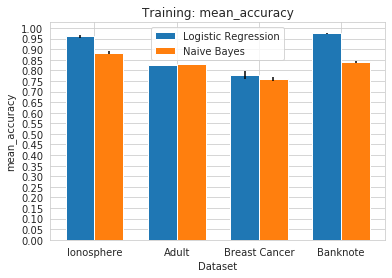

In [0]:
results_exp1 = exp1([X_ion, X_adult, X_breastcancer, X_banknote], [y_ion, y_adult, y_breastcancer, y_banknote],
                    ["Ionosphere", "Adult", "Breastcancer", "Banknote"])

In [0]:
results_exp1

NameError: ignored

## Experiment Two

In [0]:

def learning_rate_cv(X, y, learning_rate, k_folds=5):
  '''
  manual cross validation to also collect accuracies at each iteration
  '''

  train_acc_by_fold = []
  val_acc_by_fold = []

  #The array will store NumPy arrays in each element
  #Each NumPy array corresponds to the train or val accuracy as a function of iterations
  #Each NumPy array thus doesn't necessarily have the same dimensions! Different folds might take longer to reach tolerance

  X, y = random_shuffle(X, y)

  X_splits = np.array_split(X, k_folds)   #Generate splits
  y_splits = np.array_split(y, k_folds)


  for k in range(k_folds):
  
    X_val = X_splits[k]
    y_val = y_splits[k]

    X_train = np.vstack([X_splits[i] for i, _ in enumerate(X_splits) if i != k])
    y_train = np.vstack([y_splits[i] for i, _ in enumerate(y_splits) if i != k])

    train_acc_by_iter, val_acc_by_iter = test_learning_rate(X_train, y_train, X_val, y_val, learning_rate)
    #Two lists of the same length, each containing the accuracies on train/validation as a function of iterations

    train_acc_by_fold.append(np.array(train_acc_by_iter))
    val_acc_by_fold.append(np.array(val_acc_by_iter))

    #Store the arrays as list entries
  
  return train_acc_by_fold, val_acc_by_fold
    



def test_learning_rate(X_train, y_train, X_val, y_val, learning_rate):
  '''
  manual gradient descent at given learning rate that records accuracy at each iteration
  '''
  max_iterations = 100000 #Hard coded maximum so we don't run forever
  tol= 1e-4 #Tiny number. 
  #Although LogisticRegression has built-in tolerance stopping, we do it manually
  #This is because we have to record accuracies after each iteration, so can't use the fit method
  train_accuracies = []
  val_accuracies = []


  log_rg = LogisticRegression(learning_rate = learning_rate, grd_iter = max_iterations, 
                              tol = tol, lambda_penalty = 0)
  log_rg.w = np.zeros((X_train.shape[1], 1))
  log_rg.fitted = True #Initializing a model

  diff = float("inf")
  J_prev = float("inf")
  iterations = 0

  while diff > tol and iterations < max_iterations: #can stop early if converged via tol

    train_accuracies.append(evaluate_acc(y_train, log_rg.predict(X_train, add_bias=False))) #Evaluate accuracy at EACH ITERATION
    val_accuracies.append(evaluate_acc(y_val, log_rg.predict(X_val, add_bias=False)))

    grad = log_rg.gradients(X_train, y_train)
    log_rg.w = log_rg.w - learning_rate*grad #Gradient descent with specified learning rate

    J = log_rg.cost(X_train, y_train)
    diff = abs(J - J_prev) #For stopping at tolerance

    iterations += 1
  
  return train_accuracies, val_accuracies



def exp_2(X_datasets, y_datasets, dataset_labels, learning_rates):
  '''
  runs experiment for each dataset and plots the training and validation accuracies for each fold and iteration
  '''
  dataset_dict = {'figures': [], 'train_acc': [], 'val_acc': []}
  results = {'learning_rates': learning_rates}
  for ix, (X, y) in enumerate(zip(X_datasets, y_datasets)):
    label = dataset_labels[ix]
    print(f"DATASET: {label}")
    results[label] = dataset_dict
    for rate in learning_rates:
        print(f"Learning Rate: {rate}")
        train_accuracies_by_fold, val_accuracies_by_fold = learning_rate_cv(X, y, rate, 5)
        results[label]['train_acc'].append(train_accuracies_by_fold)
        results[label]['val_acc'].append(val_accuracies_by_fold)
        fig, ax = plt.subplots()
        ax.set_title(f"{label} - Learning Rate: {rate}")
        ax.set_ylabel("% Accuracy")
        ax.set_xlabel("Gradient Descent Iteration")
        ax.set_yticks(np.linspace(0, 1, 21))

        ax.plot(train_accuracies_by_fold[0], 'b-', linewidth=0.2, label="Training")
        ax.plot(val_accuracies_by_fold[0], 'g-', linewidth=0.2, label="Validation")
        ax.legend()

        for train, val in zip(train_accuracies_by_fold[1:], val_accuracies_by_fold[1:]):
          ax.plot(train, 'b-', linewidth=0.2)
          ax.plot(val, 'g-', linewidth=0.2)
        
        results[label]['figures'].append(fig)

  return results

In [0]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

results_exp2 = exp_2([X_ion, X_adult, X_breastcancer, X_banknote], 
                    [y_ion, y_adult, y_breastcancer, y_banknote],
                    ["Ionosphere", "Adult", "Breast Cancer", "Banknote"],
                    learning_rates)

DATASET: Ionosphere
Learning Rate: 0.0001
Learning Rate: 0.001
Learning Rate: 0.01
Learning Rate: 0.1
Learning Rate: 1
Learning Rate: 10
Learning Rate: 100
DATASET: Adult
Learning Rate: 0.0001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in multiply


## Experiment Three

In [0]:


def train_test_split(X, y, ratio=0.8):
  '''
  Splits datasets into train and test
  '''
  X, y = random_shuffle(X, y)
  split_ix = int(X.shape[0] * 0.8)
  X_train = X[0:split_ix, :]
  X_test = X[split_ix:, :]
  y_train = y[0:split_ix]
  y_test = y[split_ix:]
  return X_train, X_test, y_train, y_test

def exp_3(X_datasets, y_datasets, dataset_labels, train_sizes):
  '''
  For each dataset, runs cross validation at a spectrum of training set sizes.
  Records and plots train, validation, and test accuracy for each size.
  '''
  results = {'train_sizes': train_sizes, 'dataset': dataset_labels, 
             'train_acc_log_rg': [], 'train_err_log_rg': [], 'val_acc_log_rg': [], 
             'val_err_log_rg': [], 'test_acc_log_rg': [], 'train_acc_nb': [], 
             'train_err_nb': [], 'val_acc_nb': [], 'val_err_nb': [], 
             'test_acc_nb': [],'figures': []}

  log_rg = LogisticRegression(0.01, 100000)
  nb = NaiveBayes()

  for ix, (X, y) in enumerate(zip(X_datasets, y_datasets)):
    label = dataset_labels[ix]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    train_acc_log_rg = []
    train_err_log_rg = []
    val_acc_log_rg = []
    val_err_log_rg = []
    test_acc_log_rg = []

    train_acc_nb = []
    train_err_nb = []
    val_acc_nb = []
    val_err_nb = []
    test_acc_nb = []



    for train_size in train_sizes:
      X_train, y_train = random_shuffle(X_train, y_train)
      train_ix = int(X_train.shape[0] * train_size)
      X_train_actual = X_train[:train_ix, :]
      y_train_actual = y_train[:train_ix]

      train_metrics, val_metrics = k_fold_cv(5, log_rg, X_train_actual, y_train_actual)
      train_acc_log_rg.append(train_metrics['mean_accuracy'])
      train_err_log_rg.append(train_metrics['mean_accuracy_err'])
      val_acc_log_rg.append(val_metrics['mean_accuracy'])
      val_err_log_rg.append(val_metrics['mean_accuracy_err'])

      test_acc_log_rg.append(evaluate_acc(y_test, log_rg.predict(X_test)))

      train_metrics, val_metrics = k_fold_cv(5, nb, X_train_actual, y_train_actual)
      train_acc_nb.append(train_metrics['mean_accuracy'])
      train_err_nb.append(train_metrics['mean_accuracy_err'])
      val_acc_nb.append(val_metrics['mean_accuracy'])
      val_err_nb.append(val_metrics['mean_accuracy_err'])

      test_acc_nb.append(evaluate_acc(y_test, nb.predict(X_test)))

    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
    fig.suptitle(f"{label}: Train, Validation, and Test Accuracy", y=1.00, fontsize=16)
    fig.text(0.05, 0.5, '%Accuracy', ha='center', va='center', rotation='vertical')
    

    linewidth = 0.2
    log_rg_edgecolor = '#CC4F1B'
    log_rg_facecolor= '#089FFF'
    log_rg_fmt = 'b-'

    nb_edgecolor = '#1B2ACC'
    nb_facecolor='#95dbb7'
    nb_fmt = 'g-'
    alpha=0.2

    xlabel = "% of Training Set"

    y=np.linspace(0, 1, 21)

    axs[0].plot(train_sizes, train_acc_log_rg, log_rg_fmt, linewidth=linewidth, label="Logistic Regression")
    axs[0].fill_between(train_sizes, np.array(train_acc_log_rg)-np.array(train_err_log_rg), 
                        np.array(train_acc_log_rg)+np.array(train_err_log_rg), alpha=alpha, 
                        facecolor=log_rg_facecolor)

    axs[0].plot(train_sizes, train_acc_nb, nb_fmt, linewidth=linewidth, label="Naive Bayes")
    axs[0].fill_between(train_sizes, np.array(train_acc_nb)-np.array(train_err_nb), 
                        np.array(train_acc_nb)+np.array(train_err_nb), alpha=alpha, 
                        facecolor=nb_facecolor)


    axs[0].set_yticks(y)
    axs[0].set_title(f"{label} Training Set")
    axs[0].legend()


    axs[1].plot(train_sizes, val_acc_log_rg, log_rg_fmt, linewidth=linewidth, label="Logistic Regression")
    axs[1].fill_between(train_sizes, np.array(val_acc_log_rg)-np.array(val_err_log_rg), 
                        np.array(val_acc_log_rg)+np.array(val_err_log_rg), alpha=alpha, 
                        facecolor=log_rg_facecolor)

    axs[1].plot(train_sizes, val_acc_nb, nb_fmt, linewidth=linewidth, label="Naive Bayes")
    axs[1].fill_between(train_sizes, np.array(val_acc_nb)-np.array(val_err_nb), 
                        np.array(val_acc_nb)+np.array(val_err_nb), alpha=alpha, 
                        facecolor=nb_facecolor)
    
    axs[1].set_title(f"{label} Validation Set")
    axs[1].legend()


    axs[2].plot(train_sizes, test_acc_log_rg, log_rg_fmt, linewidth=linewidth, label="Logistic Regression")
    axs[2].plot(train_sizes, test_acc_nb, nb_fmt, linewidth=linewidth, label="Naive Bayes")
    axs[2].set_title(f"{label} Test Set")
    axs[2].legend()

    

    results['figures'].append(fig)



    results['train_acc_log_rg'].append(train_acc_log_rg)
    results['train_err_log_rg'].append(train_err_log_rg)
    results['val_acc_log_rg'].append(val_acc_log_rg)
    results['val_err_log_rg'].append(val_err_log_rg)

    results['test_acc_log_rg'].append(test_acc_log_rg)

    results['train_acc_nb'].append(train_acc_nb)
    results['train_err_nb'].append(train_err_nb)
    results['val_acc_nb'].append(val_acc_nb)
    results['val_acc_nb'].append(val_acc_nb)

    results['test_acc_nb'].append(test_acc_nb)

    



      







In [0]:
sizes = np.linspace(0.1, 1, 100)
results_exp3 = exp_3([X_ion, X_adult, X_breastcancer, X_banknote],
                      [y_ion, y_breastcancer, y_banknote],
                      ["Ionosphere", "Adult", "Breast Cancer", "Banknote"],
                      sizes)

In [0]:
results_exp3